
#### Esse estudo tem como intuito estudar a área da saúde, para identificar os municípios brasileiros mais adequados para a abertura de novos negócios nessa área.

Como existem muitos ***gaps*** na área da saúde, optamos por analisar os dados sobre crianças que nasceram com algum tipo de anomalia, para identificar municípios que não apresentam muitas clínicas que oferecem acompanhamento pré-natal para mulheres grávidas. Nesses municípios, pode-se encontrar oportunidades para abertura de clínicas que ofereçam esse tipo de serviço, particulares ou em parceria com o governo.


# Dicionário de Dados

**CD_MUN** - Código do Município

**AR_TER_km2** - Área Territorial em Km²

**POP_EST** – Quantidade da população Estimada

**DENS_DEM** – Densidade Demográfica (número de habitantes por km²)

**ESC** - Escolaridade

**IDHM** - Índice de Desenvolvimento Humano (escala)

**MORT_INF** – Quantidade de mortalidade Infantil

**PIB_P_CAP** - Produto Interno Bruto Per Capta (valores nominais)

**MD_CIR_G** - Quantidade de Médico Cirurgião-Geral

**MD_CLIN** - Quantidade de Médico Clínico

**MD_GIN_OBS** - Quantidade de Médico Ginecologista-Obstetra

**MD_FAM** - Quantidade de Médico de Família e Comunidade

**MD_PED** - Quantidade de Médico Pediatra

**MD_GERI** - Quantidade de Médico Geriatra

**MD_URO** - Quantidade de Médico Urologista

**AS_SOC** - Quantidade de Assistente Social

**ENF** - Quantidade de Enfermeiro

**FISIO** - Quantidade de Fisioterapeuta

**FONO** - Quantidade de Fonoaudiólogo

**NUTRI** - Quantidade de Nutricionista

**ODONTO** - Quantidade de Odontologista

**PSICO** - Quantidade de Psicólogo

**PSIQ** - Quantidade de Psiquiatra

**POSTO** - Quantidade de Posto de Saúde

**CS_UBS** - Quantidade de Centro de Saúde / Unidade Básica de Saúde

**POLICL** - Quantidade de Policlínica

**HOSP_GER** - Quantidade de Hospital Geral

**HOSP_ESP** - Quantidade de Hospital Especializado

**PRT_SOC** - Quantidade de Pronto-Socorro Geral

**PRT_ESP** - Quantidade de Pronto-Socorro Especializado

**SEM_ANOM** – Quantidade de crianças nascidas sem anomalia

**NASC** – Número de Nascimento

**ANOM** - Quantidade de crianças nascidas com alguma anomalia


#Importando as Bibliotecas

In [ ]:

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (13, 10 )
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)
np.random.seed(42)  # Define a semente para reprodução dos dados aleatórios
data = np.random.normal(size=1000)  # Cria um array com 1000 valores aleatórios com distribuição normal
q1 = np.percentile(data, 25)  # Primeiro quartil
q3 = np.percentile(data, 75)  # Terceiro quartil
iqr = q3 - q1  # Amplitude interquartil (IQR)
upper_limit = q3 + 1.5 * iqr  # Limite superior
lower_limit = q1 - 1.5 * iqr  # Limite inferior


In [ ]:
df = pd.read_csv('/content/Tabela_Compilada.csv', encoding='utf-8')

A Tabela_Compilada.csv contém dados de todos os munícipios em relação as profissiões escolhidas da área da saúde, assim como alguns dados demográficos.

# Análise Descritiva e Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_MUN      5570 non-null   int64  
 1   MUN         5570 non-null   object 
 2   AR_TER_km2  5570 non-null   float64
 3   POP_EST     5570 non-null   int64  
 4   DENS_DEM    5570 non-null   float64
 5   ESC         5570 non-null   float64
 6   IDHM        5570 non-null   float64
 7   MORT_INF    5570 non-null   float64
 8   PIB_P_CAP   5570 non-null   float64
 9   MD_CIR_G    5570 non-null   float64
 10  MD_CLIN     5570 non-null   float64
 11  MD_GIN_OBS  5570 non-null   float64
 12  MD_FAM      5570 non-null   float64
 13  MD_PED      5570 non-null   float64
 14  MD_GERI     5570 non-null   float64
 15  MD_URO      5570 non-null   float64
 16  AS_SOC      5570 non-null   float64
 17  ENF         5570 non-null   float64
 18  FISIO       5570 non-null   float64
 19  FONO        5570 non-null  

O dataframe não possui dados nulos e os tipos de dados são todos númericos, exceto o nome dos munícipios.

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,...,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,Alta Floresta D'Oeste,7067.127,22516,3.45,95.7,641.00,8.17,21552.47,1.0,...,7.0,1.0,1.0,6.0,4.0,0.0,2.0,0.0,0.0,0.0
1,1100023,Ariquemes,4426.571,111148,20.41,97.2,702.00,10.41,23206.36,7.0,...,12.0,25.0,1.0,0.0,13.0,1.0,10.0,1.0,0.0,0.0
2,1100031,Cabixi,1314.352,5067,4.80,98.1,0.65,25.00,25837.12,0.0,...,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,1100049,Cacoal,3793.000,86416,20.72,97.6,718.00,5.09,25708.96,6.0,...,128.0,45.0,6.0,1.0,11.0,5.0,8.0,0.0,1.0,0.0
4,1100056,Cerejeiras,2783.300,16088,6.12,98.5,692.00,16.88,28714.35,0.0,...,8.0,2.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,954284.000,14088,13.15,98.6,712.00,5.10,32025.46,0.0,...,2.0,4.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0
5566,5222054,Vicentinópolis,737255.000,9002,10.00,99.1,684.00,26.79,37435.76,0.0,...,1.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0
5567,5222203,Vila Boa,1060.172,6451,4.47,96.0,647.00,20.00,17160.33,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
5568,5222302,Vila Propício,2181.583,5941,2.36,96.9,634.00,56.34,28444.32,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


O dataframe nos apresenta 5570 linhas correspondente a quantidade de munícipios brasileiros, distribuída em 31 variáveis.

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CD_MUN,5570.00,3253590.77,984910.34,1100015.00,2512125.75,3146280.00,4119189.50,5300108.00
AR_TER_km2,5570.00,242470.20,258410.74,26.10,3715.94,170743.00,379095.00,999517.00
POP_EST,5570.00,38297.60,224288.15,771.00,5454.00,11732.00,25764.75,12396372.00
DENS_DEM,5570.00,108.25,571.86,0.13,11.57,24.40,51.84,13024.56
ESC,5570.00,97.14,2.66,51.80,96.60,97.60,98.50,100.00
IDHM,5570.00,591.77,210.38,0.45,579.00,651.00,712.00,862.00
MORT_INF,5570.00,19.03,10.86,1.96,11.24,18.09,24.36,181.82
PIB_P_CAP,5570.00,23513.94,24238.46,4788.18,9880.37,17433.84,28729.91,583171.85
MD_CIR_G,5570.00,1.83,20.49,0.00,0.00,0.00,0.00,1067.00
MD_CLIN,5570.00,25.86,187.25,0.00,1.00,3.00,10.00,9833.00


Aqui foi feita a escolha de que todos os dados númericos representado como float apresentarão 2 casas decimais.

# Gráfico de Person

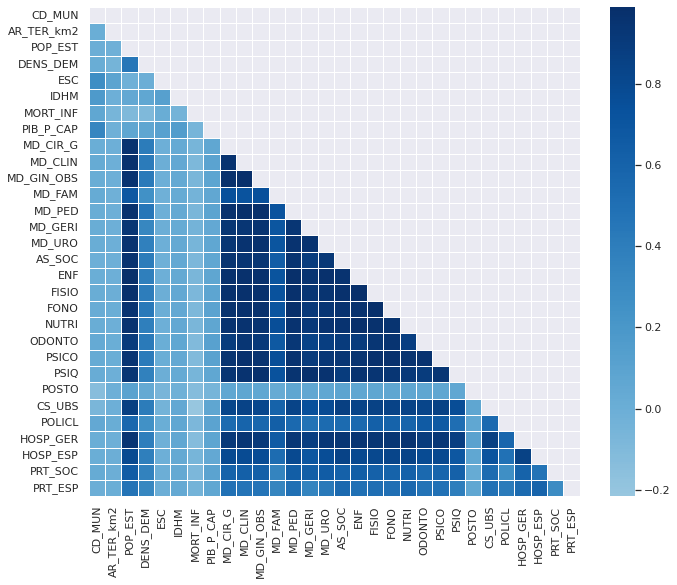

In [ ]:
# computando a matrix de correlação das variaveis (todas por todas)
corr = df.corr()

# retirando o triangulo superior da matrix (ele é espelhado a parte inferior)
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(11, 9))

# gerando a matrix
sns.heatmap(corr, mask= mask, center= 0, linewidth= 0.5, cmap='Blues');

Gráfico de Pearson que correlaciona as variáveis umas com as outras, sendo que as correlações mais altas estão com cores mais escuras e as mais baixas com cores mais claras. Foi retirado a parte superior direita do gráfico para uma melhor visualização. Sendo que a POP_EST foi o que maior se correlacionou com a quantidade de profissionais da área da saúde.


In [ ]:
cols=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM',
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ',
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

pop_est=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM',
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ',
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

Foi feita um lista das colunas que mais estão correlacionadas (maior ou = 0.5)

Criando um novo data frame para feature engineering para criar colunas novas

In [ ]:
# Primeira linha é para olhar todas as colunas que existe no data frame
pd.set_option('display.max_columns', None)
# Estatisticas Básicas
df.describe()

,CD_MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
count,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00
mean,3253590.77,242470.20,38297.60,108.25,97.14,591.77,19.03,23513.94,1.83,25.86,4.19,0.19,7.45,0.17,0.46,6.81,49.07,17.92,4.47,6.65,16.08,13.48,1.70,1.58,7.10,1.88,0.97,0.18,0.05,0.01
std,984910.34,258410.74,224288.15,571.86,2.66,210.38,10.86,24238.46,20.49,187.25,43.66,2.86,69.97,2.94,5.78,46.04,457.63,129.45,32.19,52.32,97.45,85.03,20.26,3.12,13.37,14.96,3.42,1.96,0.36,0.17
min,1100015.00,26.10,771.00,0.13,51.80,0.45,1.96,4788.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2512125.75,3715.94,5454.00,11.57,96.60,579.00,11.24,9880.37,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,0.00,1.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,3146280.00,170743.00,11732.00,24.40,97.60,651.00,18.09,17433.84,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,3.00,1.00,1.00,2.00,2.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00
75%,4119189.50,379095.00,25764.75,51.84,98.50,712.00,24.36,28729.91,0.00,10.00,1.00,0.00,1.00,0.00,0.00,3.00,17.00,8.00,2.00,3.00,7.00,6.00,1.00,2.00,8.00,1.00,1.00,0.00,0.00,0.00
max,5300108.00,999517.00,12396372.00,13024.56,100.00,862.00,181.82,583171.85,1067.00,9833.00,2355.00,142.00,3550.00,185.00,325.00,2302.00,25044.00,6874.00,1593.00,2484.00,4384.00,4102.00,1200.00,78.00,522.00,581.00,157.00,69.00,15.00,6.00


In [ ]:
# feature Engineering = trocamos os valores absoluto das linhas por intervalos para facilitar a visualização
df['PSICO'] = pd.cut(df['PSICO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['ODONTO'] = pd.cut(df['ODONTO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_CIR_G'] = pd.cut(df['MD_CIR_G'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_GIN_OBS'] = pd.cut(df['MD_GIN_OBS'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_FAM'] = pd.cut(df['MD_FAM'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_PED'] = pd.cut(df['MD_PED'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_GERI'] = pd.cut(df['MD_GERI'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_URO'] = pd.cut(df['MD_URO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['AS_SOC'] = pd.cut(df['AS_SOC'], bins=[0,5,10,50,100,500,5000], labels=False)
df['FONO'] = pd.cut(df['FONO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['NUTRI'] = pd.cut(df['NUTRI'], bins=[0,5,10,50,100,500,5000], labels=False)
df['PSIQ'] = pd.cut(df['PSIQ'], bins=[0,5,10,50,100,500,5000], labels=False)
df['FISIO'] = pd.cut(df['FISIO'], bins=[0,5,10,50,100,500,5000,6000,7000], labels=False)
df['ENF'] = pd.cut(df['ENF'], bins=[0,5,10,50,100,500,5000,10000,15000,20000,30000], labels=False)
df['POP_EST'] = pd.cut(df['POP_EST'], bins=[0,5000,10000,50000,100000,200000,500000,1000000,15000000], labels=False)

Realizando a troca dos valores absoluto das linhas por intervalos para facilitar a visualização

# Gráficos de Contagem

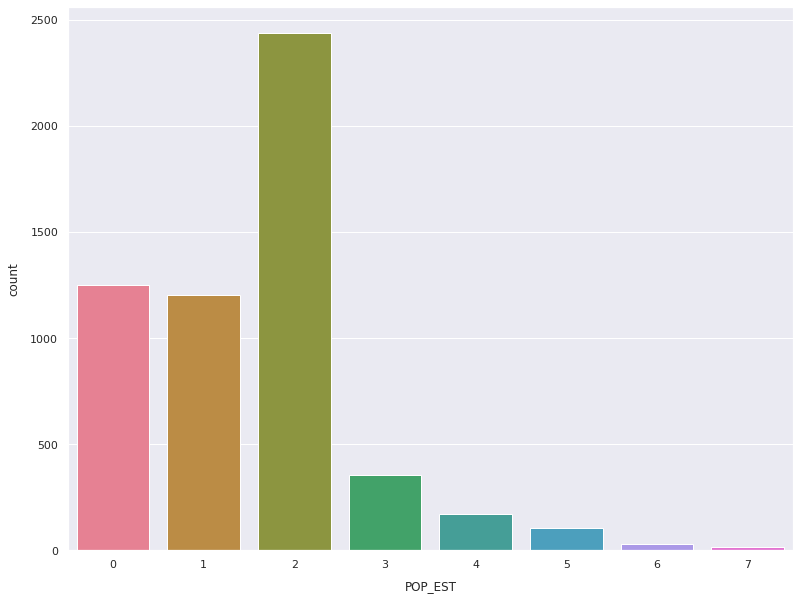

In [ ]:
sns.countplot(data=df,x='POP_EST', palette='husl');

O gráfico apresenta as quantidades de cidades com cada intervalo de população. Nos proximos gráficos será feito a quantidade de
especialistas que o SUS oferece versus a estimativa da população.

O gráfico foi realizado na escala de 0 a 7 no eixo X, que representa os valores de 0,5,10,50,100,500,5000

**Contagem de ocorrências de Psicólogos por quantidade de população estimada no DataFrame**

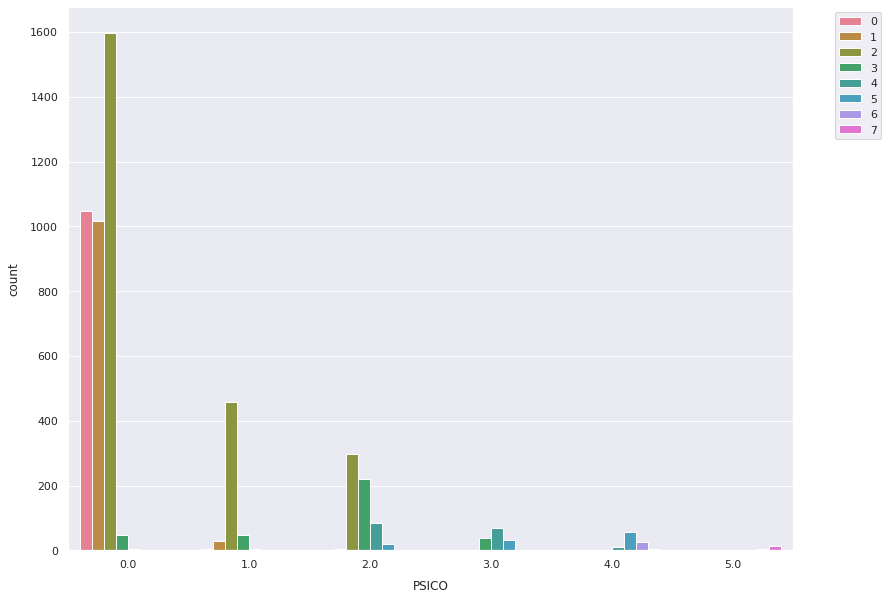

In [ ]:
ax=sns.countplot(data=df,x='PSICO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 10 psicologos na cidade, quanto menor a estimativa da população menor a quantidade de psicologos.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de odontólogos por quantidade de população estimada no DataFrame**

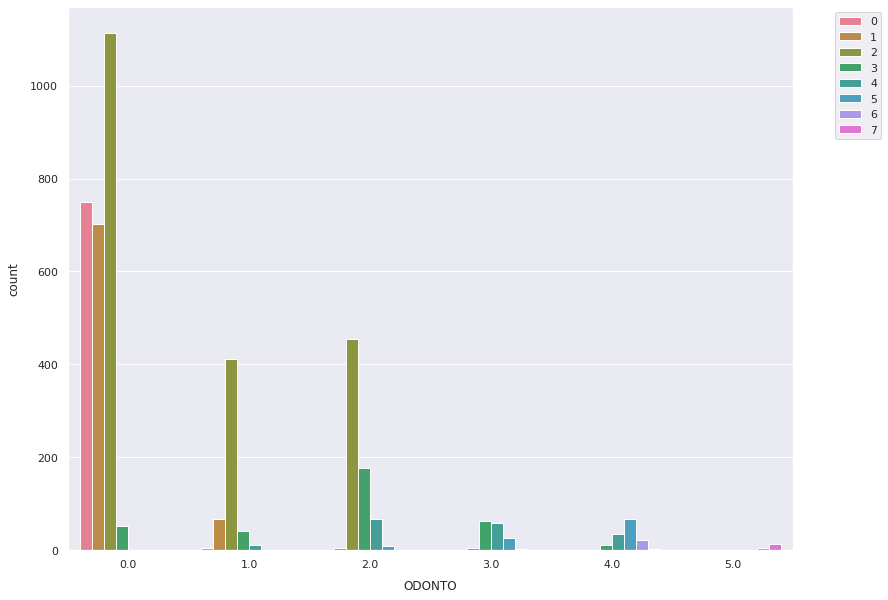

In [ ]:
ax=sns.countplot(data=df,x='ODONTO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 10 odontotistas na cidade, quanto menor a estimativa da população menor a quantidade de odontotistas.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de médicos cirurgiões por quantidade de população estimada no DataFrame**


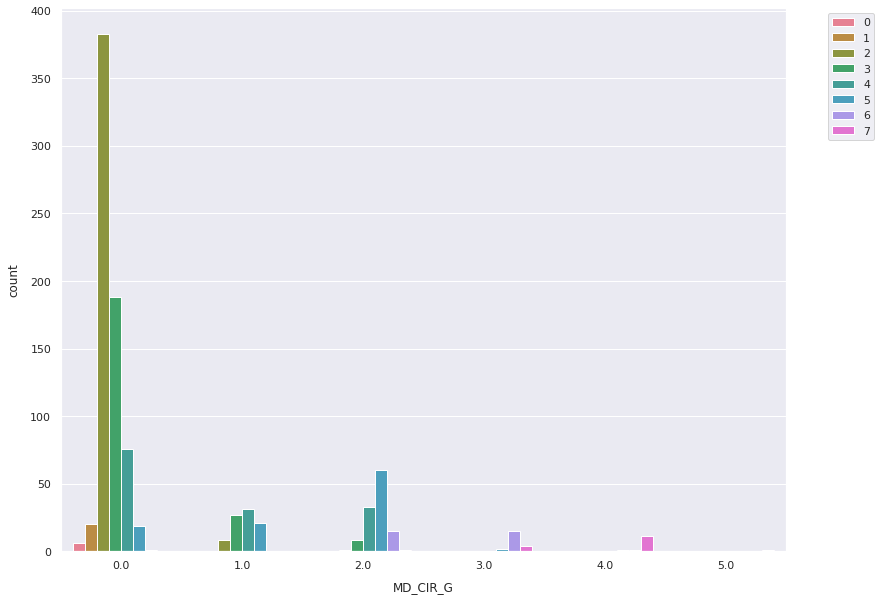

In [ ]:
ax=sns.countplot(data=df,x='MD_CIR_G', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 médico cirurgião geral na cidade, quanto menor a estimativa da população menor a quantidade de médicos.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de médicos ginenologistas /obstetras por quantidade de população estimada no DataFrame**


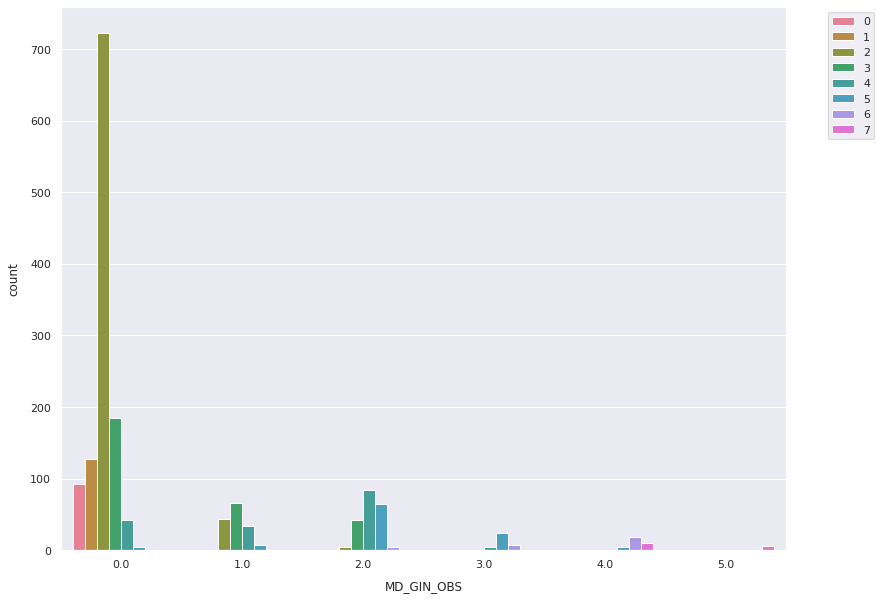

In [ ]:
ax=sns.countplot(data=df,x='MD_GIN_OBS', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 médicos ginecologistas obstetra na cidade, quanto menor a estimativa da população menor a quantidade de médico ginecologista obstetra.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de médicos de família por quantidade de população estimada no DataFrame**


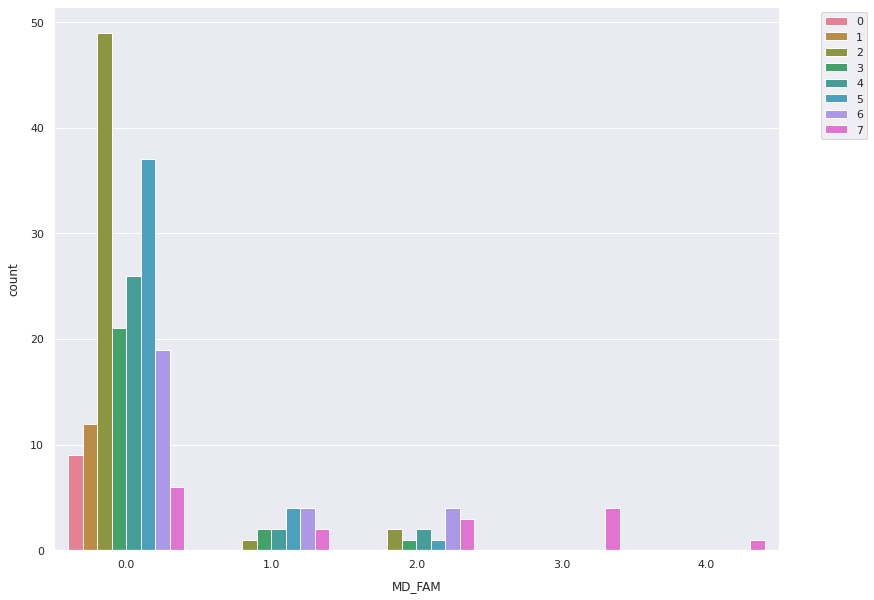

In [ ]:
# EXISTEM POUCOS MEDICOS DE FAMILIA
ax=sns.countplot(data=df,x='MD_FAM', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


A maioria dos municipios tem até 5 médicos da familia na cidade, quanto menor a estimativa da população menor a quantidade de médico da familia.

O gráfico foi realizado na escala de 0 a 4 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de médicos pediatras por quantidade de população estimada no DataFrame**


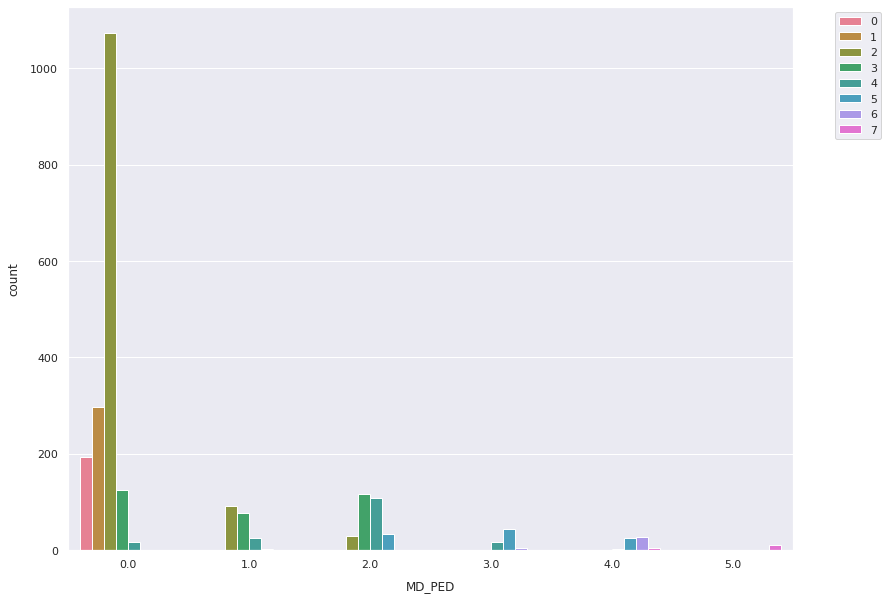

In [ ]:
ax=sns.countplot(data=df,x='MD_PED', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 médicos pediatra na cidade, quanto menor a estimativa da população menor a quantidade de médico pediatra.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de médicos geriatras por quantidade de população estimada no DataFrame**


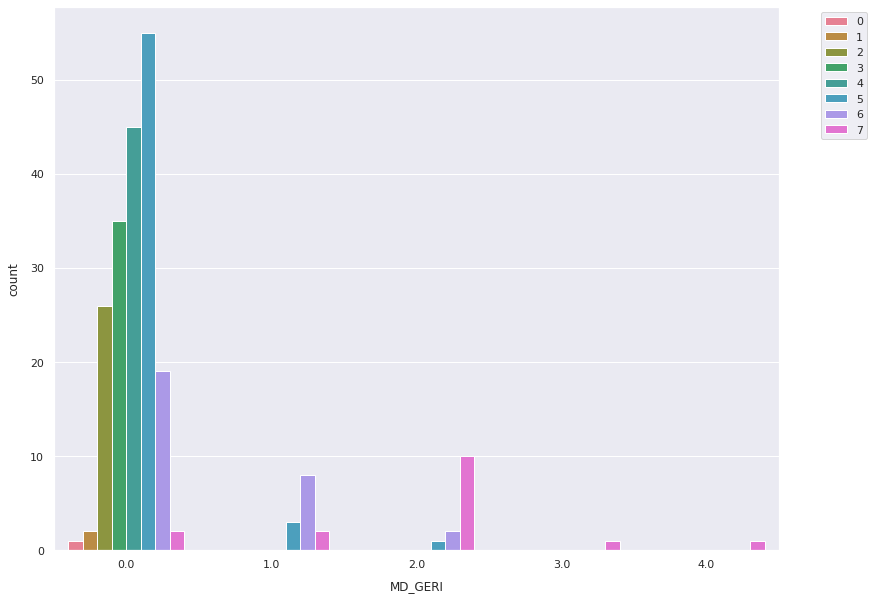

In [ ]:
ax=sns.countplot(data=df,x='MD_GERI', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 médicos geriatra na cidade, quanto menor a estimativa da população menor a quantidade de médico geriatra.

O gráfico foi realizado na escala de 0 a 4 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

In [ ]:
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 assistente social na cidade, quanto menor a estimativa da população menor a quantidade de assistente social.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

---



**Contagem de ocorrências de fonoaudiólogos por quantidade de população estimada no DataFrame**


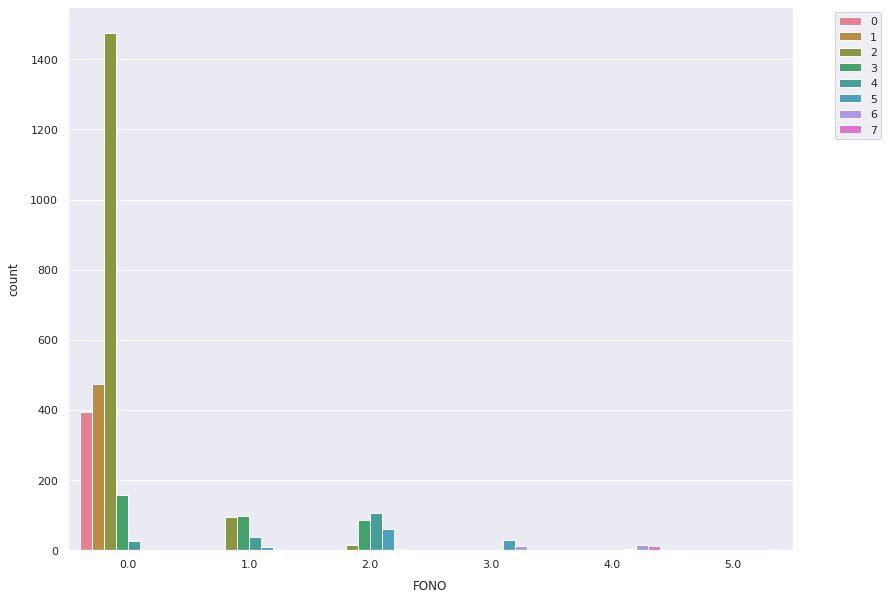

In [ ]:
ax=sns.countplot(data=df,x='FONO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5  fonoaudiólogos na cidade, quanto menor a estimativa da população menor a quantidade de fonoaudiologo.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de nutricionistas por quantidade de população estimada no DataFrame**

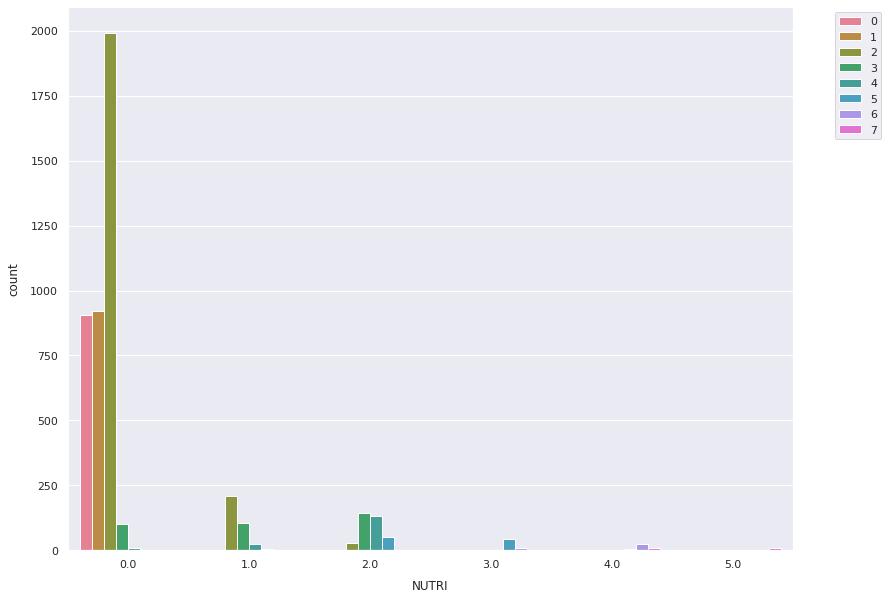

In [ ]:
ax=sns.countplot(data=df,x='NUTRI', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 nutricionista na cidade, quanto menor a estimativa da população menor a quantidade de nutricionista.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de psiquiatras por quantidade de população estimada no DataFrame**

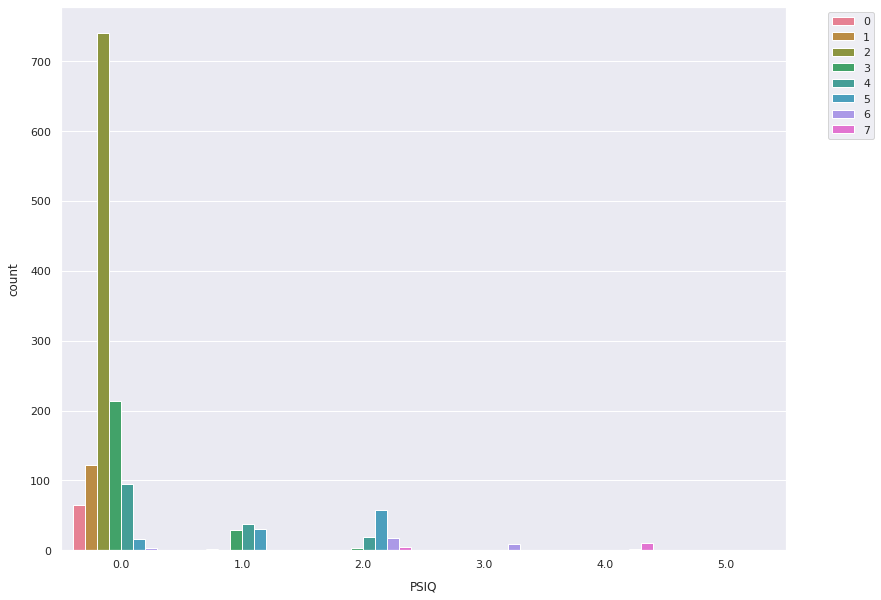

In [ ]:
ax=sns.countplot(data=df,x='PSIQ', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 psiquiatras na cidade, quanto menor a estimativa da população menor a quantidade de psiquiatras.

O gráfico foi realizado na escala de 0 a 5 no eixo X, que representa os valores de 0,5,10,50,100,500,5000.

**Contagem de ocorrências de fisioterapeutas por quantidade de população estimada no DataFrame**

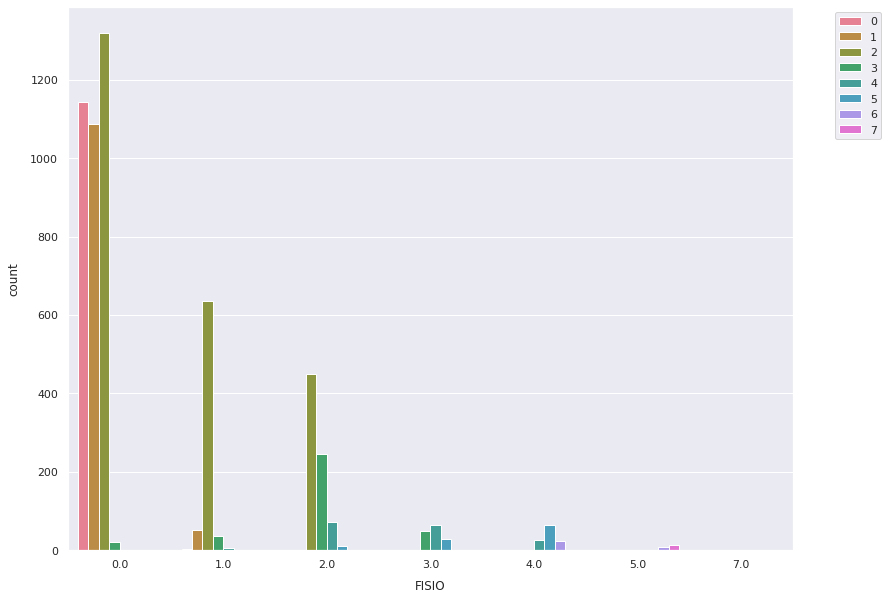

In [ ]:
ax=sns.countplot(data=df,x='FISIO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 50 fisioterapeuta na cidade, quanto menor a estimativa da população menor a quantidade de fisioterapeuta.

O gráfico foi realizado na escala de 0 a 7 no eixo X, que representa os valores de 0,5,10,50,100,500,5000,6000,7000.

**Contagem de ocorrências de enfermeiros por quantidade de população estimada no DataFrame**

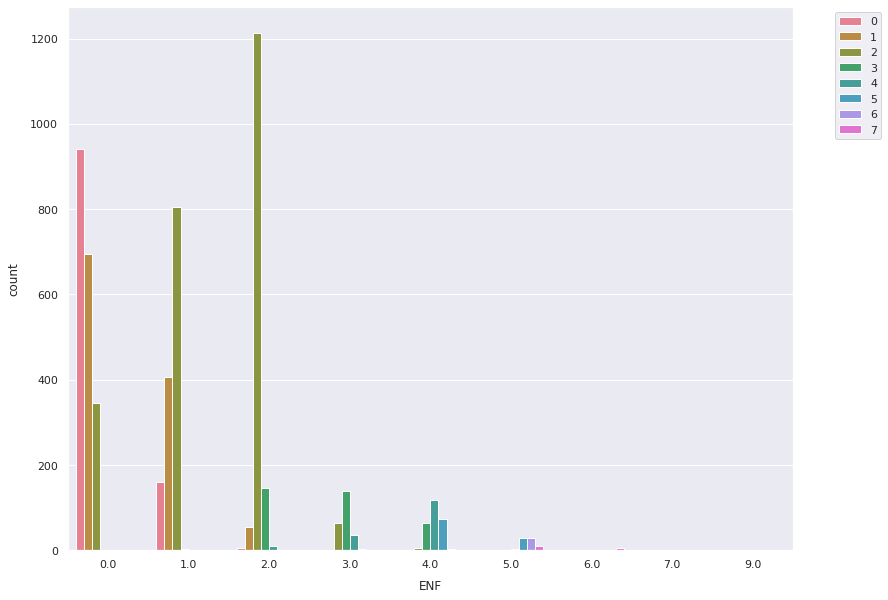

In [ ]:
ax=sns.countplot(data=df,x='ENF', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 100 enfermeiros na cidade, quanto menor a estimativa da população menor a quantidade de enfermeiro

O gráfico foi realizado na escala de 0 a 9 no eixo X, que representa os valores de 0,5,10,50,100,500,5000,10000,15000,20000,30000.

A partir da Analise Exploratória, decidiu-se verificar a relação dos profissionais da saúde disponiveis nos municipios com a porcentagem de de recém nascidos com algum tipo de anomalia. Para isso foi adicionado uma nova tabela do Data SUS com os dados sobre nascimento nos municipios.

In [ ]:
df2 = pd.read_csv('/content/A011613189_28_143_208.csv', sep= ';', encoding= 'latin-1')

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,Alta Floresta D'Oeste,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00
1,1100023,Ariquemes,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00
2,1100031,Cabixi,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00
3,1100049,Cacoal,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00
4,1100056,Cerejeiras,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5566,5222054,Vicentinópolis,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5567,5222203,Vila Boa,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00
5568,5222302,Vila Propício,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# colocando os nomes dos municipios em maiusculo e retirando todos os caracteres especiais
df['MUN'] = df['MUN'].str.upper()
df['MUN'] = df['MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5566,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5567,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00
5568,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# retirando os valores numericos com codigos das cidades e mantendo somente os nomes
df2['MUN'] = df2['MUN'].str.extract('(\D+)', expand=False).str.strip()
df2

,MUN,Nao,Total
0,ALTA FLORESTA D'OESTE,331,333
1,ARIQUEMES,1483,1507
2,CABIXI,68,69
3,CACOAL,1314,1325
4,CEREJEIRAS,268,269
...,...,...,...
5565,VIANOPOLIS,170,172
5566,VICENTINOPOLIS,138,139
5567,VILA BOA,51,51
5568,VILA PROPICIO,53,53


In [ ]:
# juntando os dois dfs para incluir as colunas de total de nascidos vivos e nascidos vivos sem anomalias
df = pd.merge(df, df2, on="MUN", how= 'left')
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,Nao,Total
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00,331.00,333.00
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00,1483.00,1507.00
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,68.00,69.00
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00,1314.00,1325.00
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00,268.00,269.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,170.00,172.00
6232,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,138.00,139.00
6233,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00,51.00,51.00
6234,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,53.00


In [ ]:
df = df.rename(columns={'Nao': 'SEM_ANOM', 'Total': 'NASC'})

In [ ]:
# Calcula a porcentagem da coluna 'B' em relação à soma de todas as entradas na coluna 'B'
#df['ANOM'] = 100- (df['SEM_ANOM']*100 / df['NASC'])
df['ANOM'] = df['NASC'] - df['SEM_ANOM']

Foi criada uma nova coluna ANOM, que significa crianças que nsceram com algum tipo de anomalia, e elas foram calculadas com o total de nascimentos - a quatidade de crianças sem anomalia sendo igual nascidos com anomalia em porcentagem.

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,SEM_ANOM,NASC,ANOM
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00,331.00,333.00,2.00
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00,1483.00,1507.00,24.00
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,68.00,69.00,1.00
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00,1314.00,1325.00,11.00
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00,268.00,269.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,170.00,172.00,2.00
6232,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,138.00,139.00,1.00
6233,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00,51.00,51.00,0.00
6234,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,53.00,0.00


In [ ]:
df.describe()

,CD_MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,SEM_ANOM,NASC,ANOM
count,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,1052.00,6236.00,1793.00,244.00,2625.00,235.00,528.00,4745.00,6009.00,6020.00,3511.00,5304.00,4652.00,5741.00,1647.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6221.00,6221.00,6221.00
mean,3244090.83,241919.84,1.56,106.58,97.14,591.63,19.01,23410.90,0.45,25.09,0.50,0.25,0.53,0.22,0.30,0.38,1.20,0.62,0.33,0.30,0.74,0.52,0.25,1.59,7.10,1.83,0.96,0.17,0.05,0.01,474.25,487.16,12.91
std,982942.81,257644.14,1.19,552.28,2.70,209.65,10.85,25183.07,0.89,179.43,0.97,0.67,1.02,0.61,0.70,0.81,1.21,1.02,0.79,0.74,1.12,0.97,0.68,3.09,12.99,14.33,3.29,1.88,0.35,0.17,2493.68,2557.89,94.97
min,1100015.00,26.10,0.00,0.13,51.80,0.45,1.96,4788.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00
25%,2510907.00,3770.96,1.00,11.86,96.60,579.00,11.19,9806.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,60.00,62.00,0.00
50%,3143128.50,170835.50,2.00,24.69,97.60,648.00,18.03,17242.76,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,139.00,143.00,2.00
75%,4118414.25,374527.25,2.00,52.72,98.50,712.00,24.36,28651.74,0.00,10.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,1.00,1.00,0.00,2.00,8.00,1.00,1.00,0.00,0.00,0.00,328.00,336.00,5.00
max,5300108.00,999517.00,7.00,13024.56,100.00,862.00,181.82,583171.85,5.00,9833.00,5.00,4.00,5.00,4.00,4.00,5.00,9.00,7.00,5.00,5.00,5.00,5.00,5.00,78.00,522.00,581.00,157.00,69.00,15.00,6.00,144007.00,147133.00,3126.00


In [ ]:
# Visualizando os outliers

def get_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = get_outliers(df['ANOM'])
print('Número de outliers: '+ str(len(outliers)))
print('Maior outlier: '+ str(outliers.max()))
print('Menor outlier: '+ str(outliers.min()))
print('')
outliers

Número de outliers: 751
Maior outlier: 3126.0
Menor outlier: 13.0



1        24.00
11       20.00
16      323.00
22       16.00
34       20.00
         ...  
6195     40.00
6211     27.00
6221     22.00
6229   1068.00
6235   2508.00
Name: ANOM, Length: 751, dtype: float64

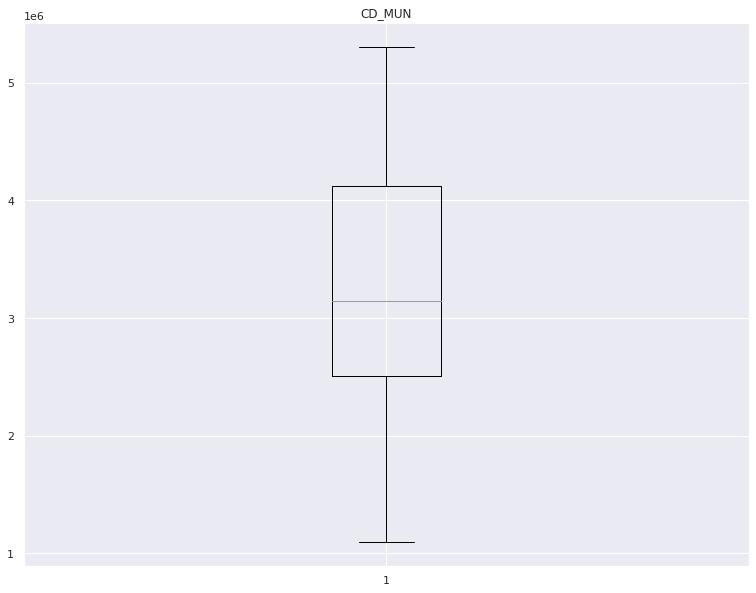

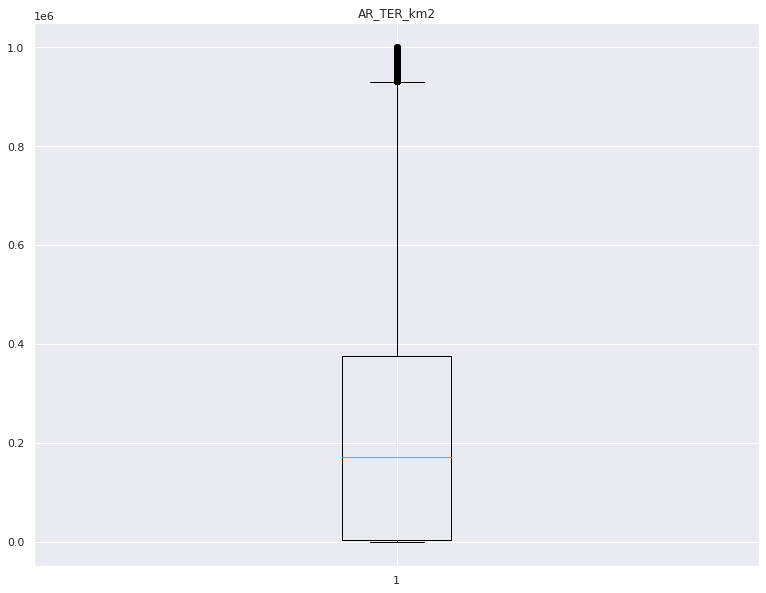

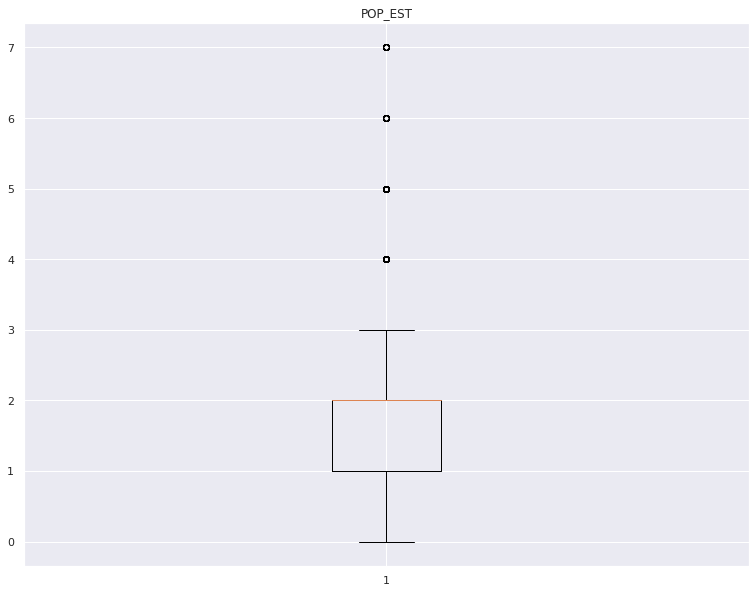

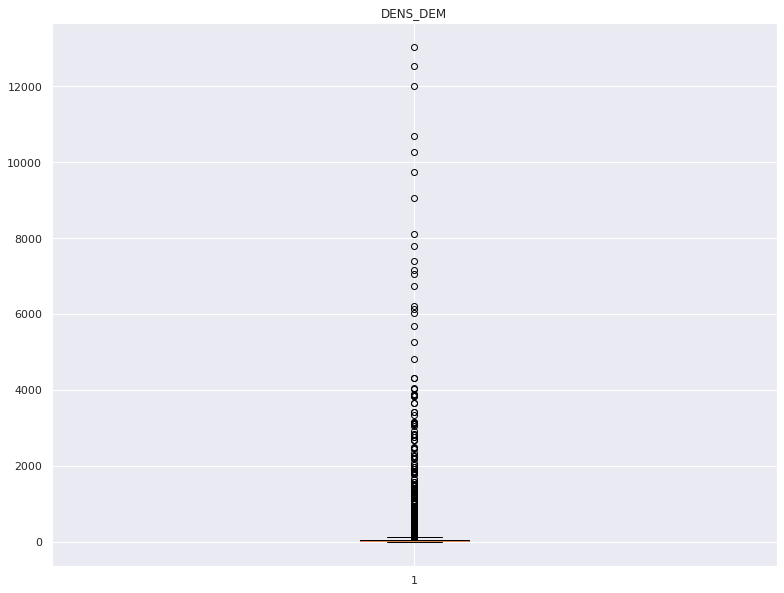

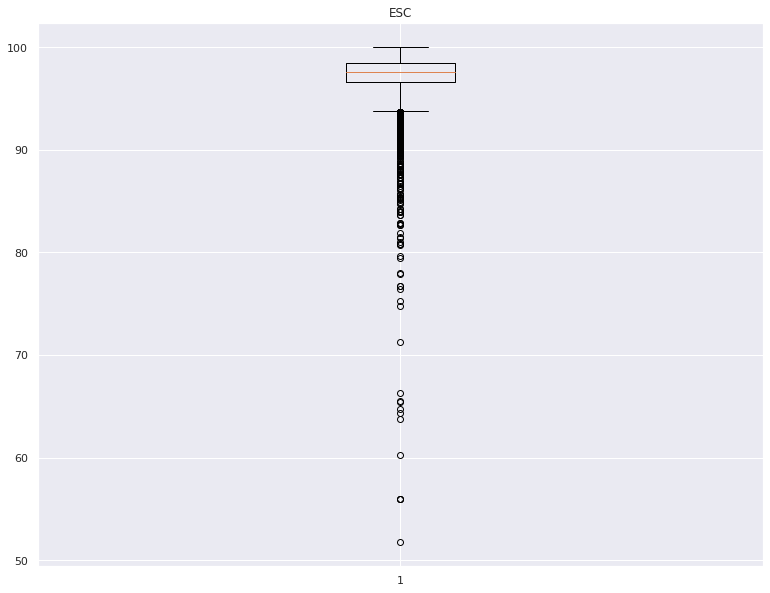

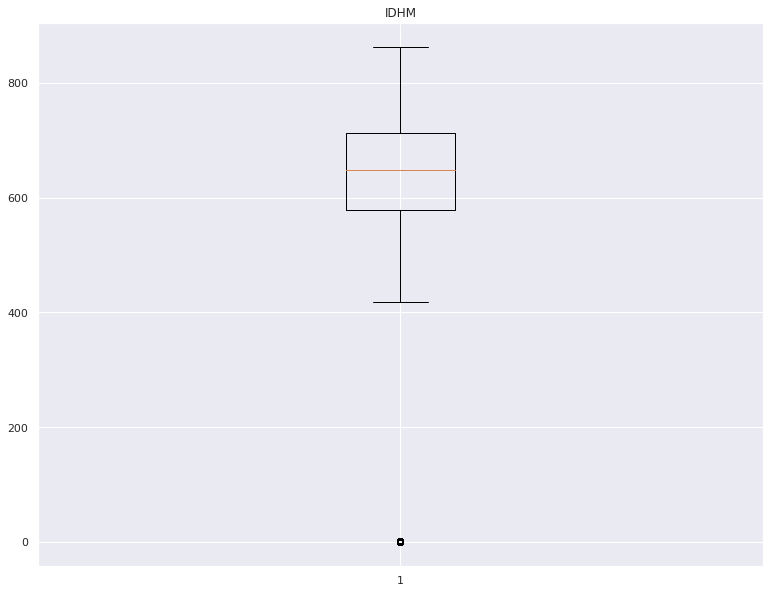

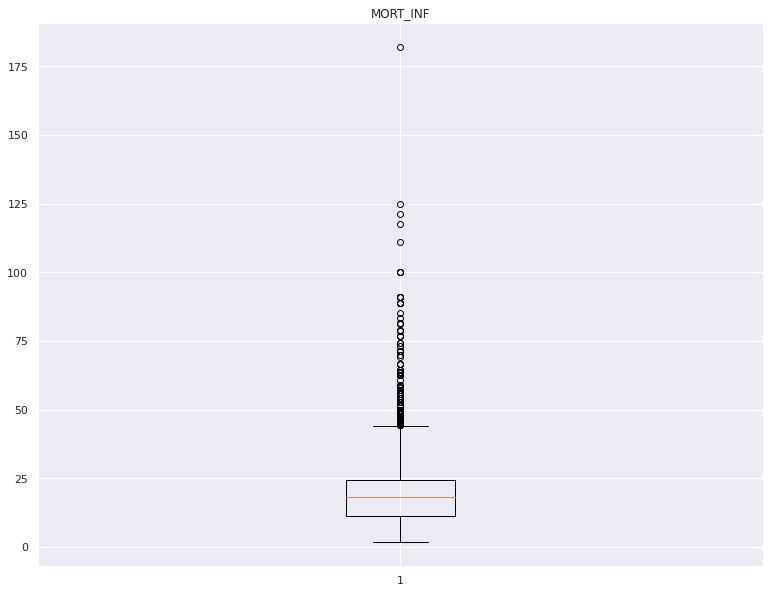

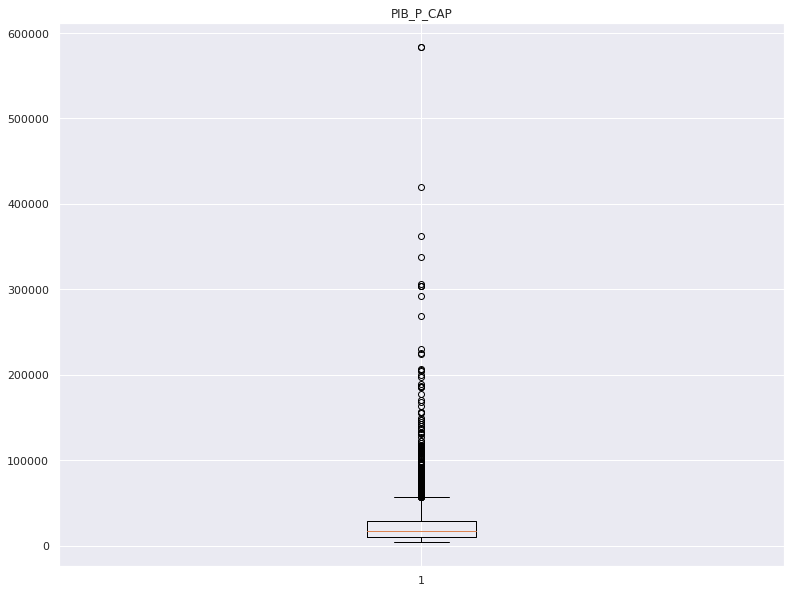

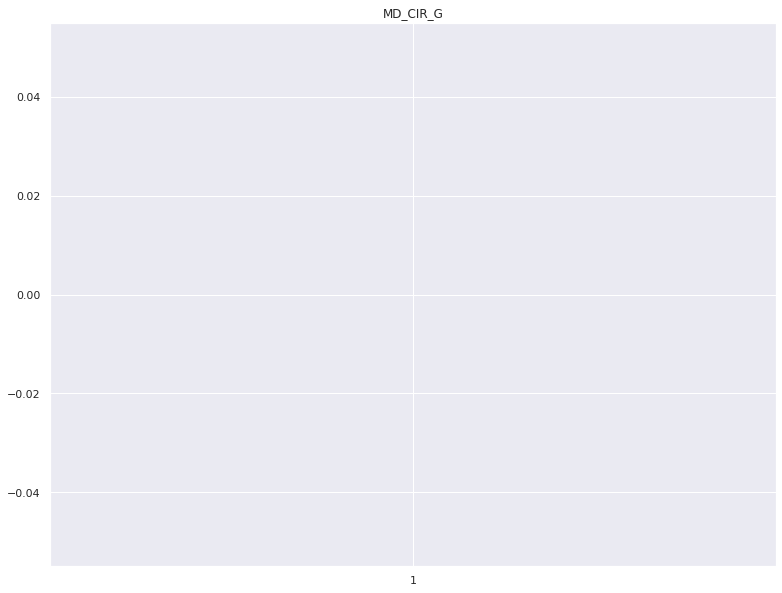

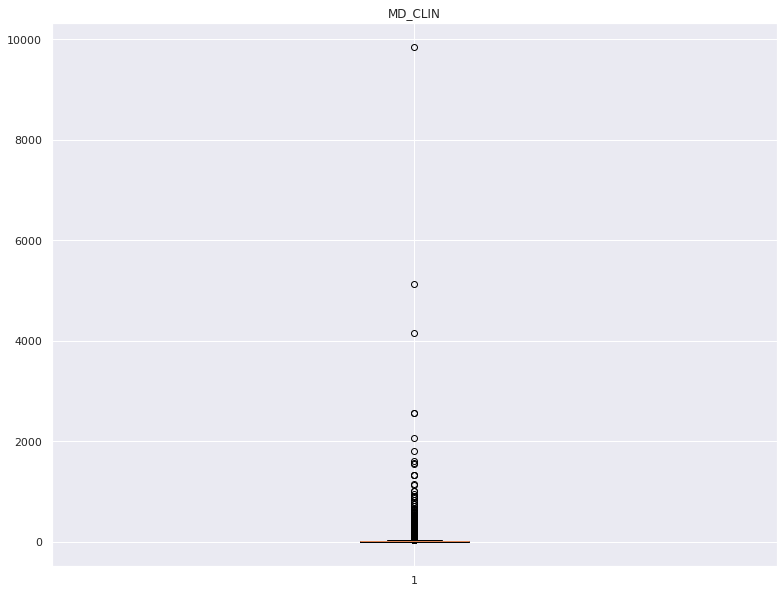

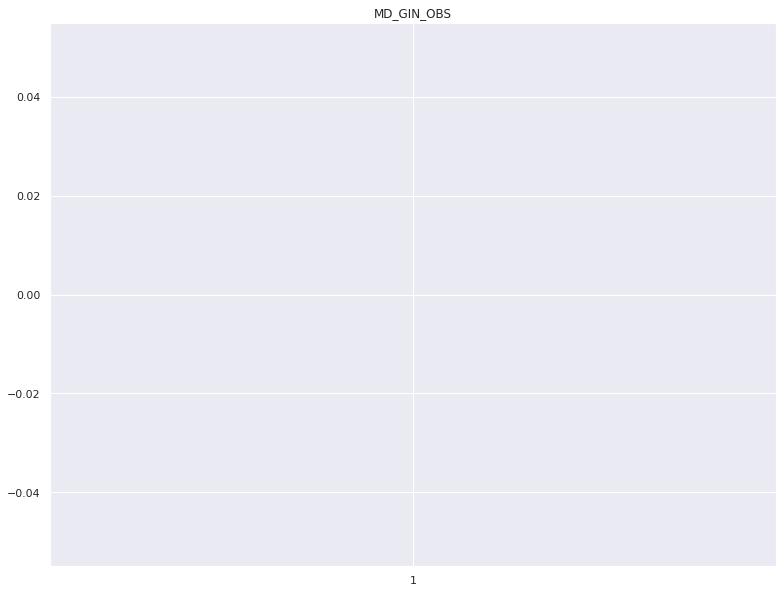

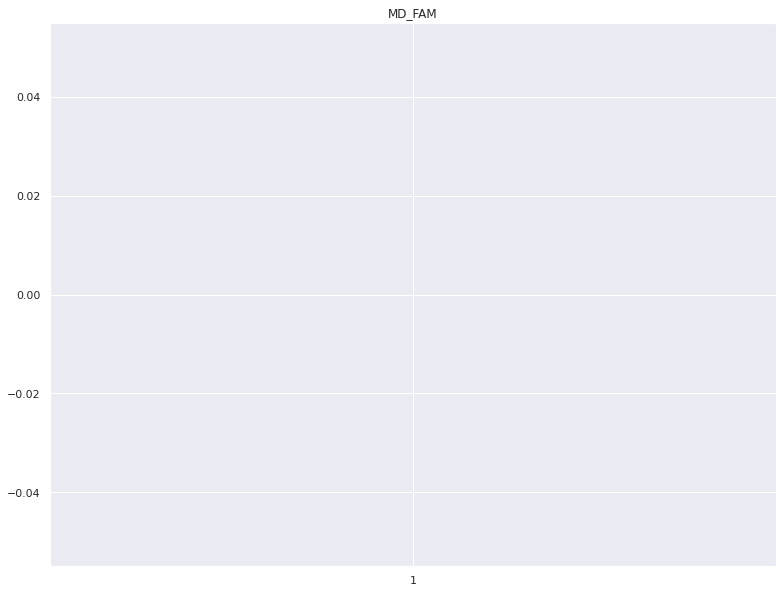

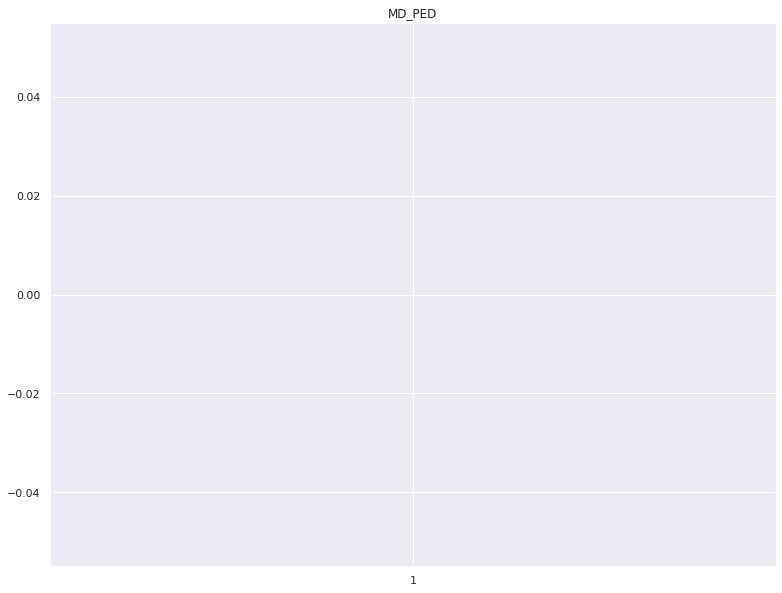

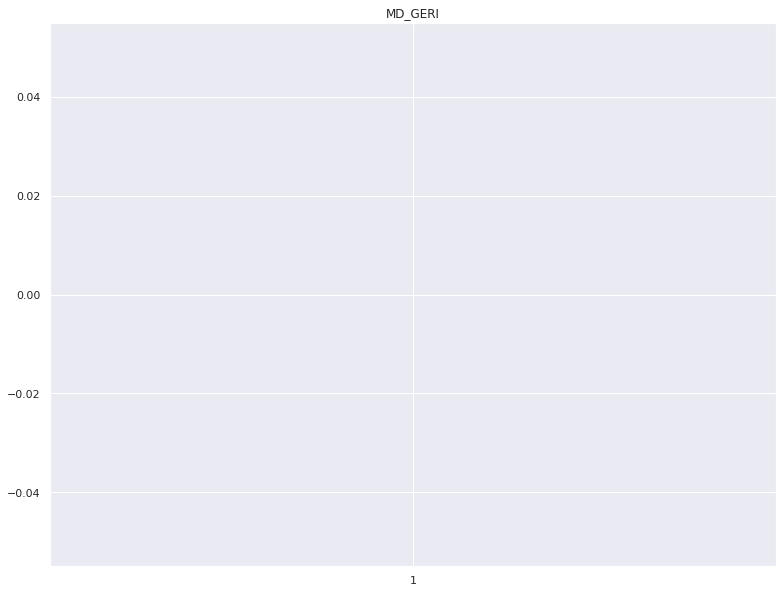

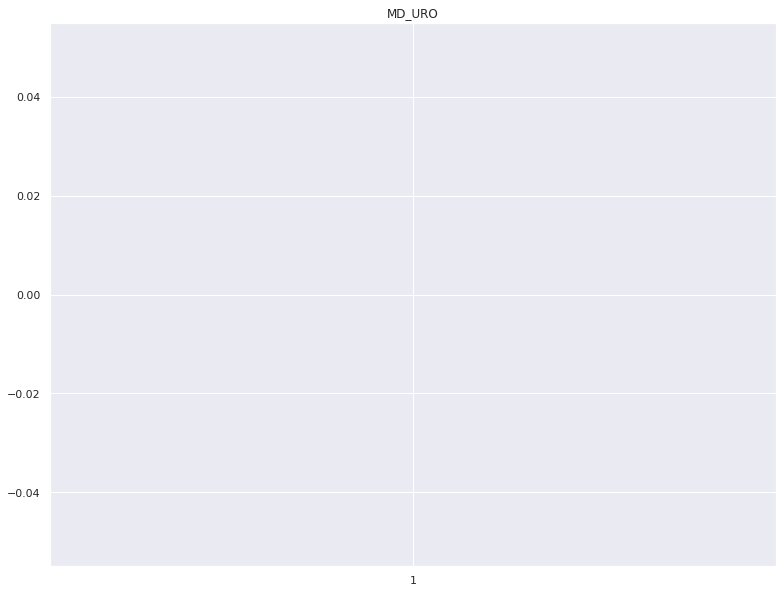

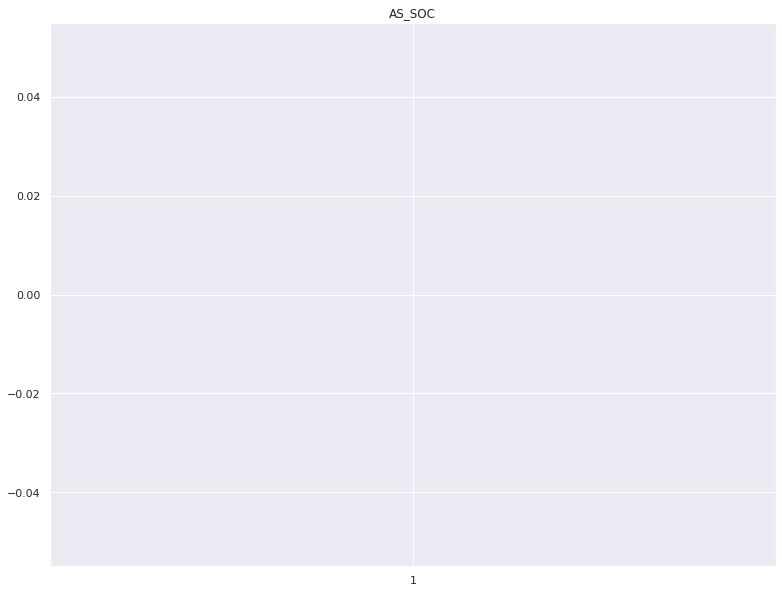

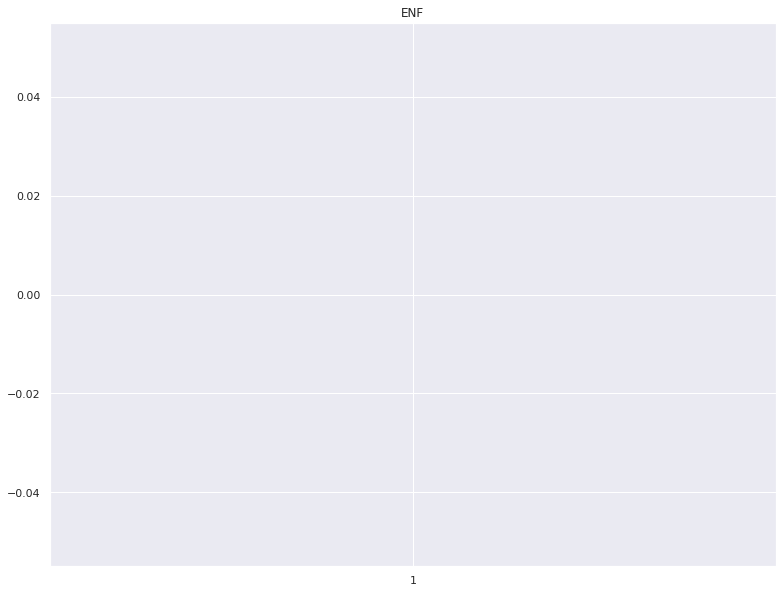

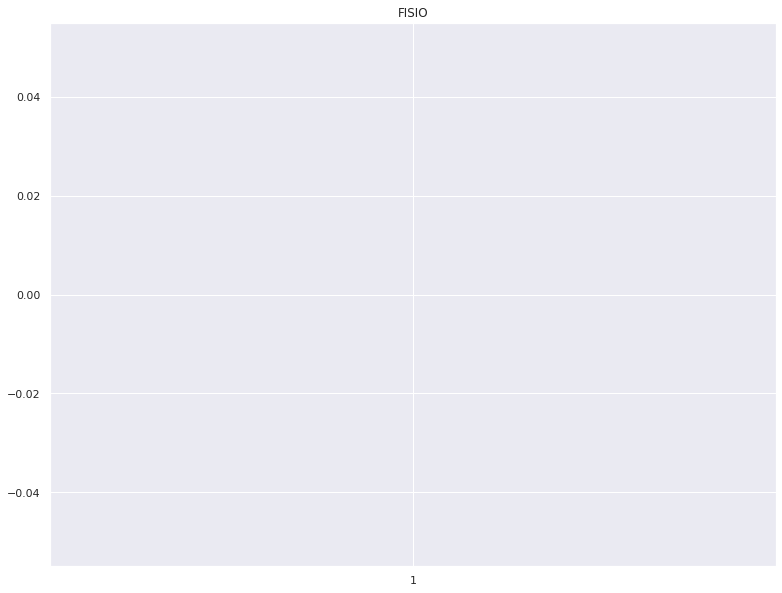

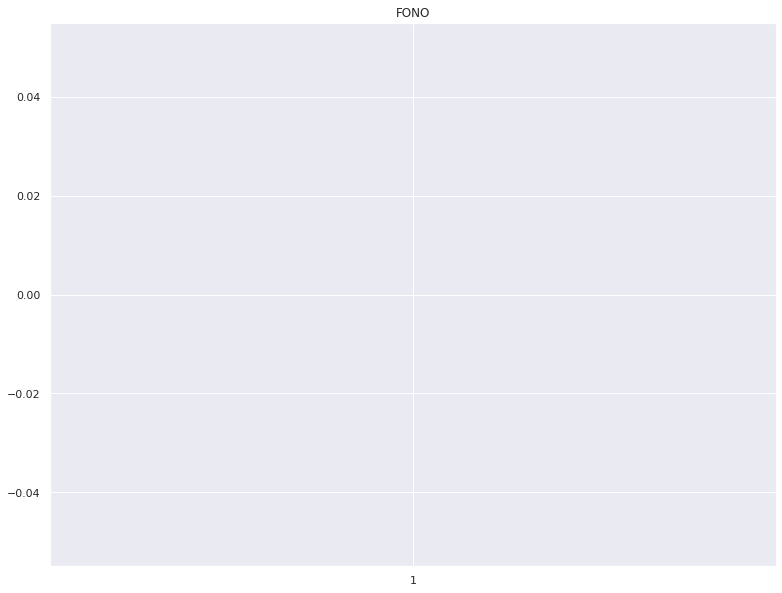

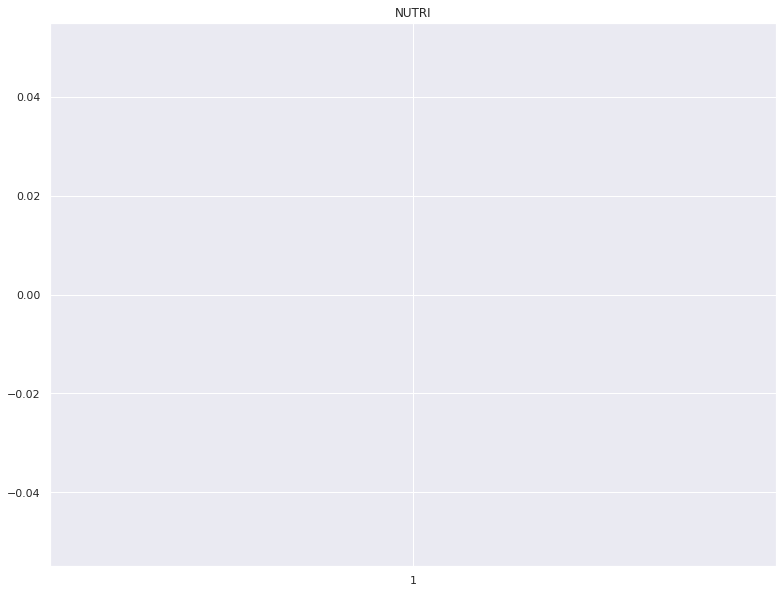

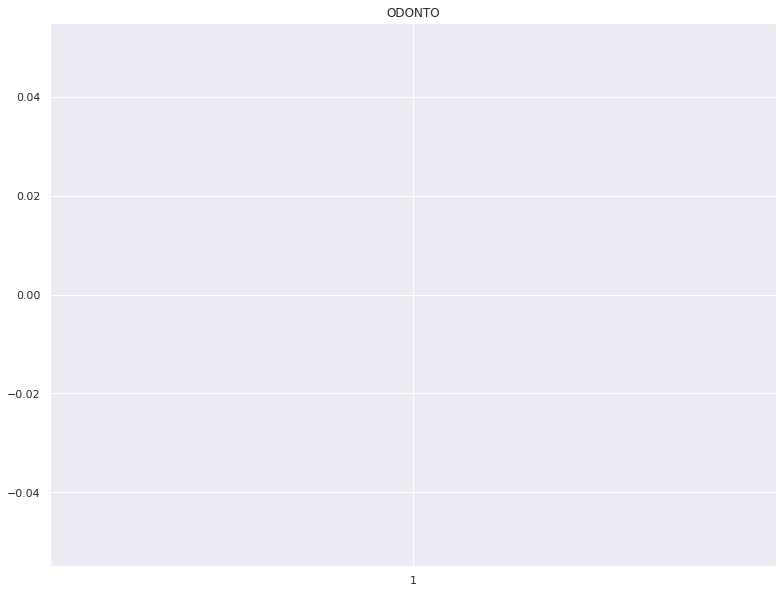

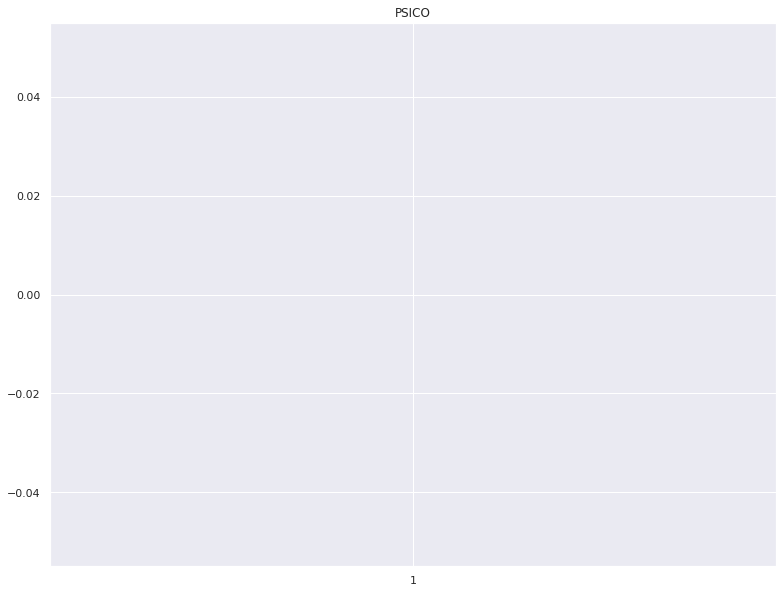

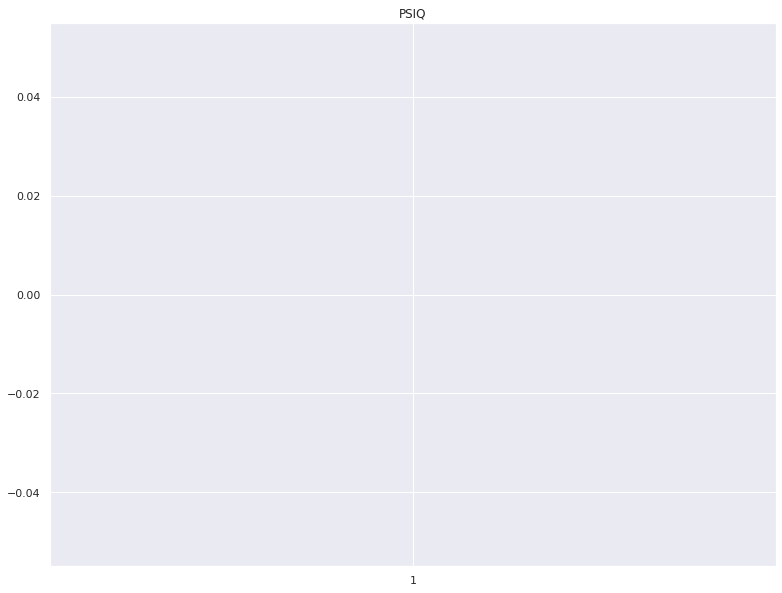

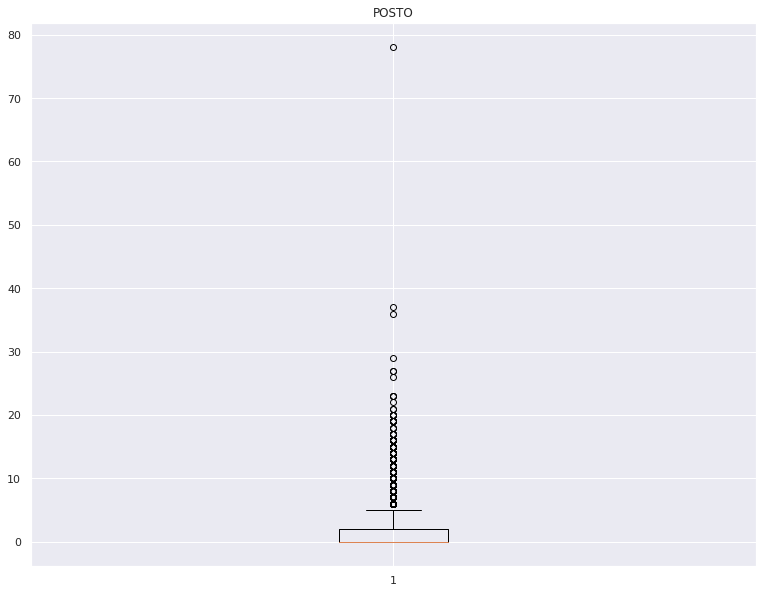

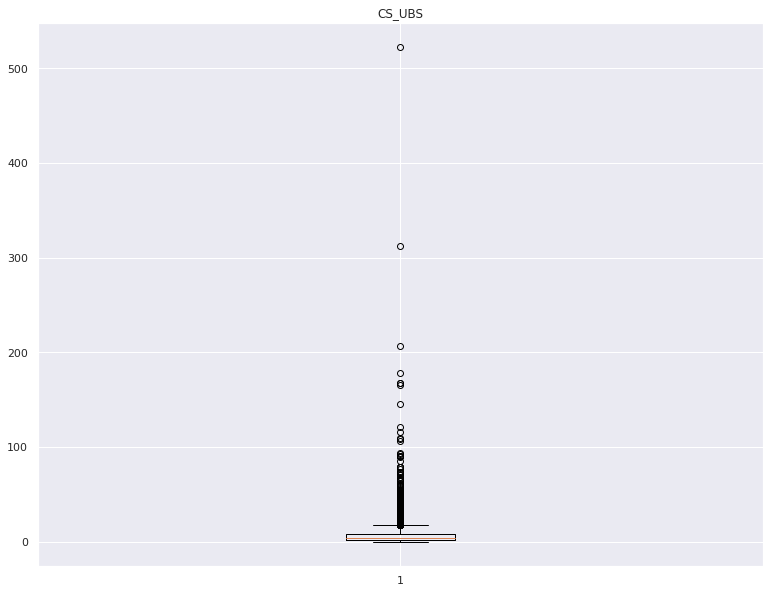

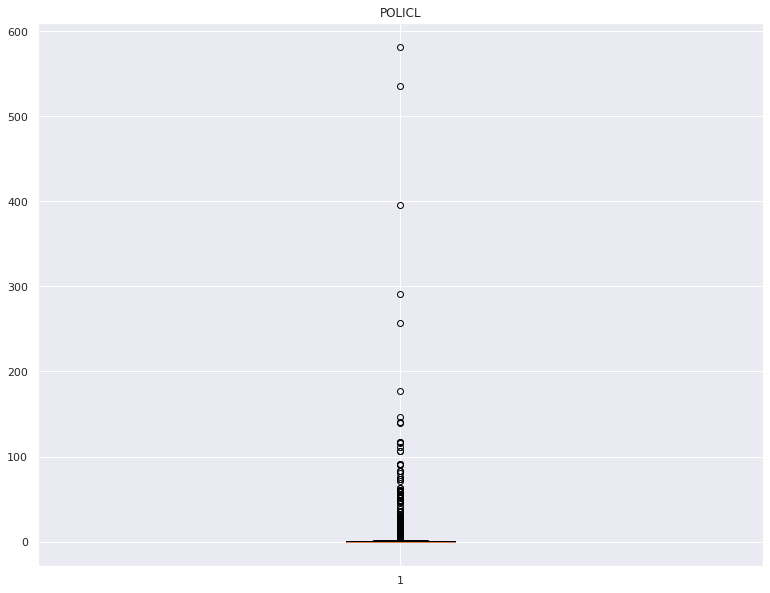

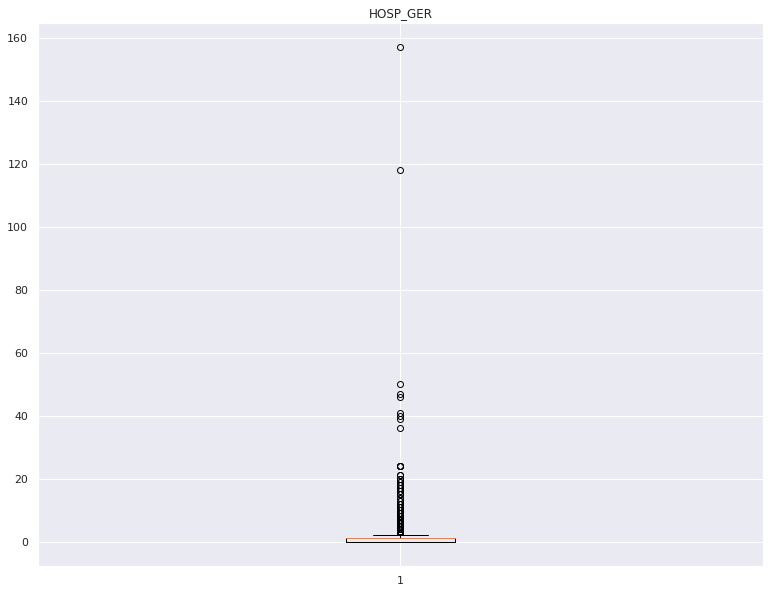

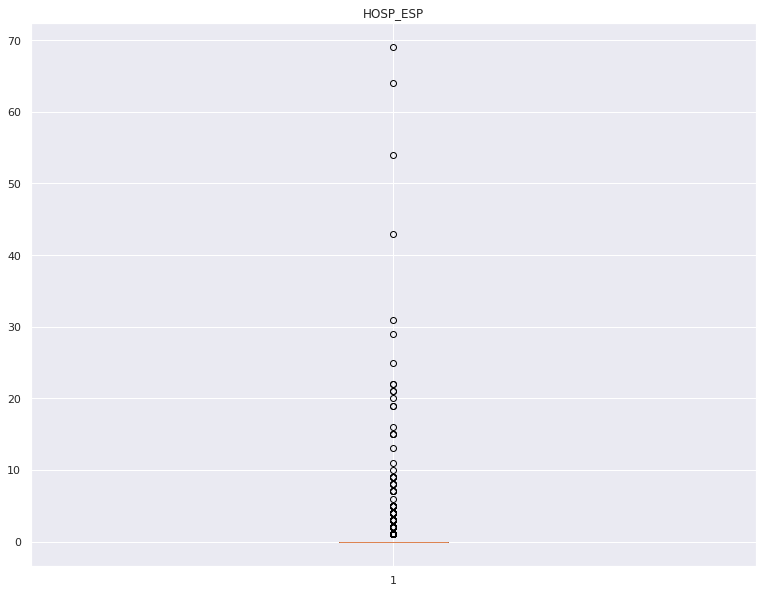

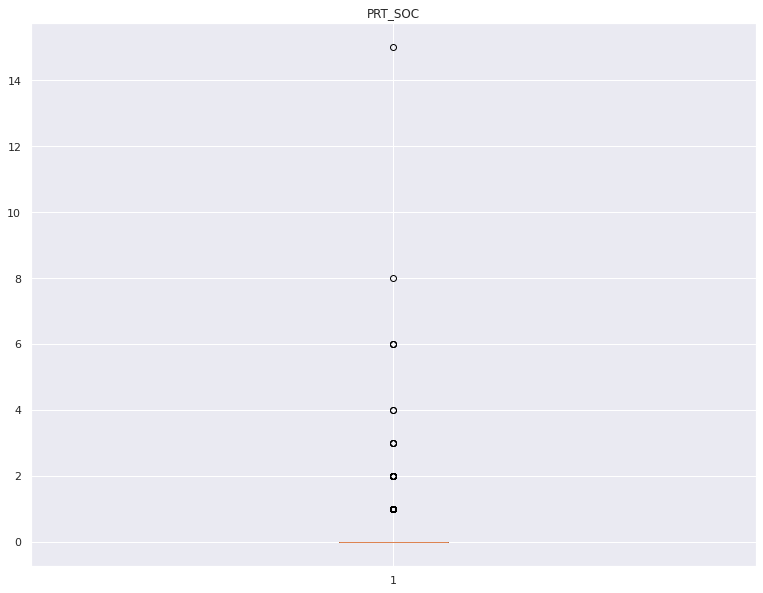

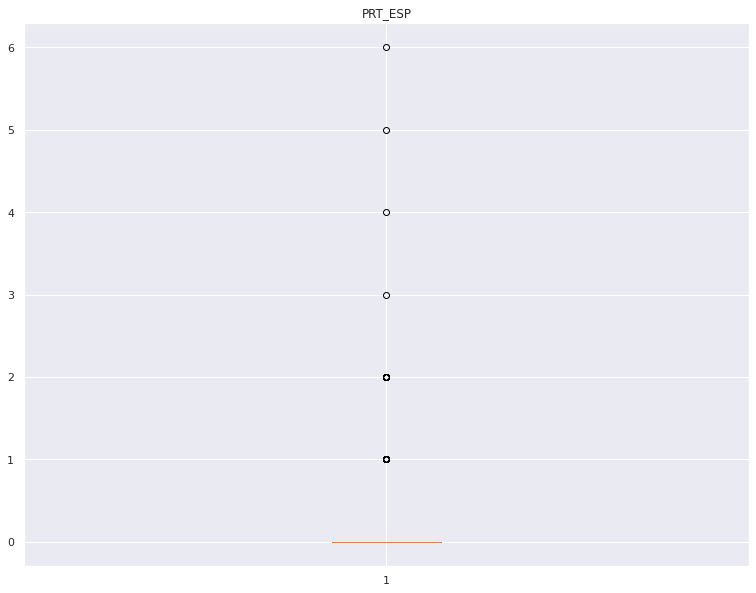

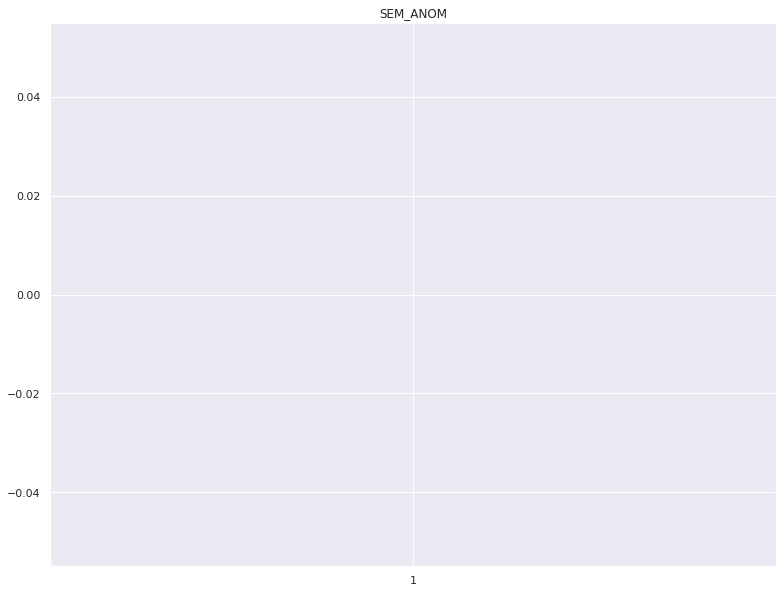

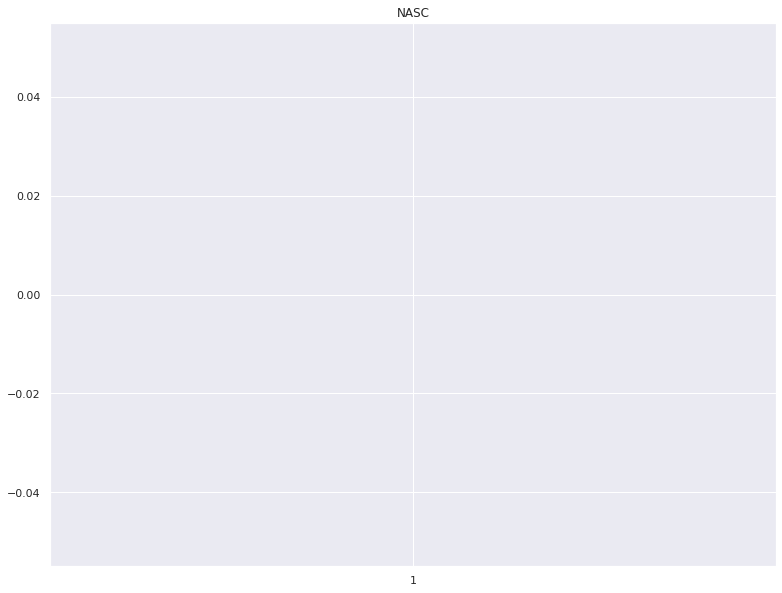

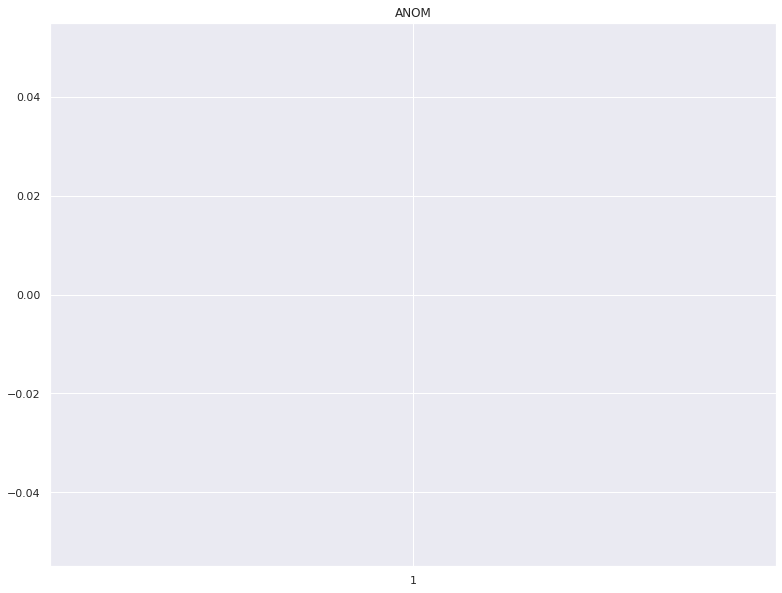

In [ ]:
# Extrair as colunas numéricas do dataframe
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plotar gráficos de boxplot para todas as colunas numéricas
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Todos os box-plots mostram pontos flutuantes, ou seja outliers.

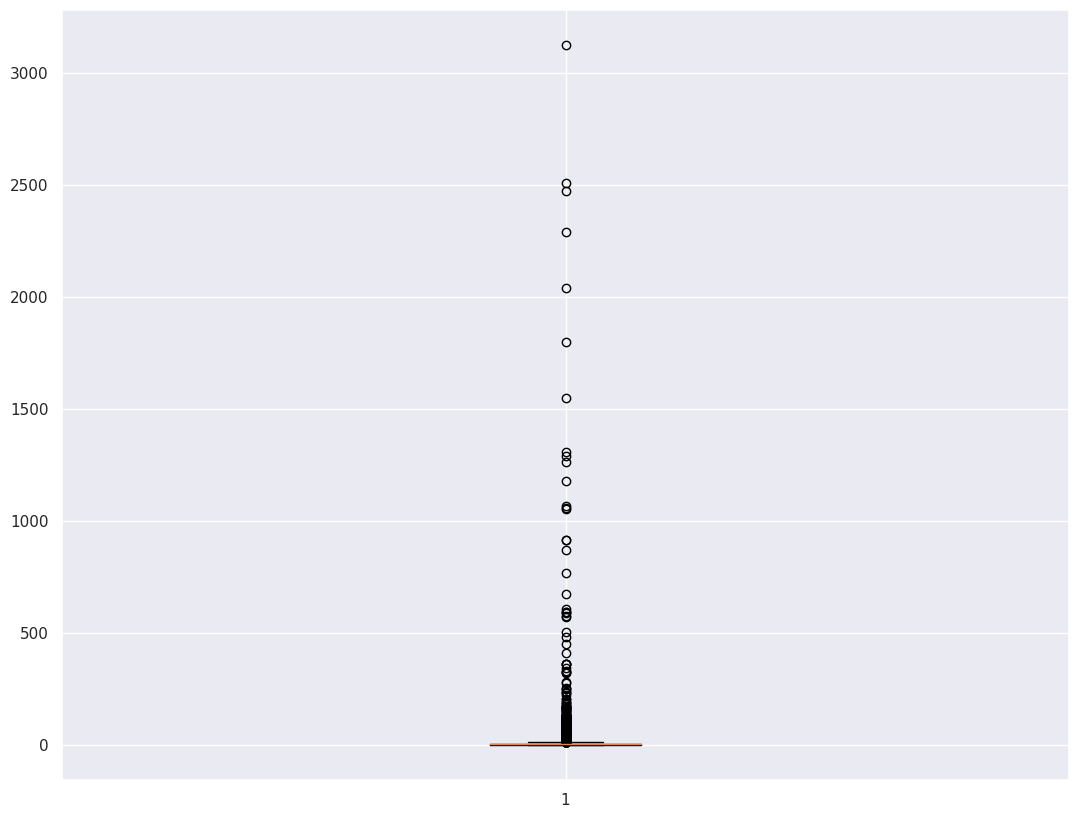

In [ ]:
# Criando o gráfico de boxplot na variável target
plt.boxplot(df['ANOM'],  vert = 1, patch_artist = False)
plt.show()

Há muitos pontos fora das "caixas" (boxes) de um box plot, isso significa que existem valores extremos ou atípicos (outliers) nos dados. Valores extremos são aqueles que estão muito distantes dos valores típicos (ou centrais) dos dados e podem ter um grande impacto em estatísticas descritivas, como média e desvio padrão. Esses valores também podem indicar erros de medição, inconsistências nos dados ou eventos raros. Portanto, é importante examinar esses pontos com cuidado para entender a natureza dos dados e decidir se é necessário removê-los ou tratá-los de alguma forma, no nosso caso, vamos removê-los.

**Deletando os outliers**

In [ ]:
def drop_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna(subset=['ANOM'])
   return outliers_dropped

df = drop_outliers(df)
df

<ipython-input-41-7ec17d723106>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,SEM_ANOM,NASC,ANOM
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2.00,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,NaN,4.00,0.00,2.00,0.00,0.00,0.00,331.00,333.00,2.00
2,1100031,CABIXI,1314.35,1.00,4.80,98.10,NaN,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,68.00,69.00,1.00
3,1100049,CACOAL,3793.00,3.00,20.72,97.60,718.00,5.09,25708.96,NaN,NaN,2.00,0.00,2.00,NaN,0.00,NaN,4.00,NaN,NaN,NaN,NaN,2.00,NaN,1.00,11.00,NaN,NaN,0.00,NaN,0.00,NaN,NaN,11.00
4,1100056,CEREJEIRAS,2783.30,2.00,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00,268.00,269.00,1.00
5,1100064,COLORADO DO OESTE,1451.06,2.00,12.81,97.60,685.00,4.67,20362.88,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,199.00,203.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,5221908,VARJAO,519194.00,0.00,7.05,97.90,687.00,NaN,17334.13,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,28.00,29.00,1.00
6231,5222005,VIANOPOLIS,NaN,2.00,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,170.00,172.00,2.00
6232,5222054,VICENTINOPOLIS,737255.00,1.00,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,138.00,139.00,1.00
6233,5222203,VILA BOA,1060.17,1.00,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00,51.00,51.00,0.00


Foi realizada a detecção e remoção de outliers usando a técnica do IQR (Interquartile Range ou Amplitude Interquartil) que é uma medida estatística utilizada para identificar a dispersão dos dados de uma amostra. O IQR é calculado como a diferença entre o terceiro quartil (75%) e o primeiro quartil (25%) da amostra, e só não foi utilizada na coluna ANOM.

In [ ]:
df=df.fillna(0)
'''df['ANOM'] = pd.cut(df['ANOM'], bins=[1.5, 100], labels=False)
df=df.fillna(0)'''

"df['ANOM'] = pd.cut(df['ANOM'], bins=[1.5, 100], labels=False)\ndf=df.fillna(0)"

In [ ]:
df['ANOM'].value_counts()

0.00       1662
1.00       1182
2.00        811
3.00        464
4.00        338
           ... 
571.00        1
412.00        1
74.00         1
172.00        1
2508.00       1
Name: ANOM, Length: 176, dtype: int64

Foi criado uma classificação das crianças com anomalia de 0, 1, 2, 5, e 100, sendo os valores escolhidos por 75% dos valores estavam entre 0 e 2, porém existiam valores acima disso.

In [ ]:
#df=df.drop(['SEM_ANOM', 'NASC'], axis=1)

### Modelos



Para descobrirmos quais são as possiveis variavéis que podem estar interferindo na quantidade de nascidos vivos com anomalia, utilizaremos modelos de predição por aprendizado de máquina.
Esse é um problema de classificação e como análise inicial utilizaremos modelos baseeados em construção de árvores de decisão: Decision Tree e Random Forest.


**Importação de bibliotecas para poder realizar a regressão linear no modelo**

In [ ]:
import sklearn

# importando as bibliotecas para o cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
y=df['ANOM']
x=df.drop(columns=['ANOM', 'CD_MUN', 'MUN', 'SEM_ANOM', 'NASC'])

# Separando os datasets para treino do modelo e para o teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Foi decidido separar o dataset em 10 partes para que cada vez que o  algoritmo rodar ele tente acertar em 10%.

In [ ]:
reg = LinearRegression().fit(x_train, y_train)


Essa linha de código cria um objeto LinearRegression e o ajusta aos dados de treinamento x_train e y_train, armazenando o modelo resultante na variável reg.

A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou preditoras). No caso do código apresentado, espera-se que a variável dependente seja y_train e as variáveis independentes sejam as colunas de x_train. A partir desses dados, a regressão linear ajusta uma linha reta que melhor se ajusta aos pontos, com o objetivo de prever os valores de y com base nos valores de x. O modelo pode ser usado para fazer previsões em novos dados.

In [ ]:
print(reg.score(x_train, y_train))


0.4292888695484477


o valor retornado foi 0.4292888695484477 que é a acurácia do modelo, ou seja, a porcentagem de acertos nas previsões feitas pelo modelo nos dados de treinamento. No caso apresentado, o que significa que o modelo acertou apenas cerca de 43% das previsões nos dados de treinamento.

É importante ressaltar que a acurácia nos dados de treinamento não é uma medida definitiva da qualidade do modelo, já que um modelo pode ter uma acurácia alta nos dados de treinamento e não generalizar bem para novos dados. Portanto, é necessário avaliar o desempenho do modelo em dados de teste ou em validação cruzada para uma avaliação mais precisa da sua capacidade de generalização.

In [ ]:
print(reg.coef_)

[-1.66089905e-01  4.63544998e-01 -1.47953596e-02 -9.33726813e-02
 -3.29898786e-02  3.33136773e-02 -1.13483670e-01  1.11022302e-16
 -2.16426535e-02  2.31131686e-01  0.00000000e+00  2.31106842e-01
  5.20417043e-17 -2.77555756e-17 -4.16333634e-17  5.44937187e-01
  1.08524924e-01  0.00000000e+00  0.00000000e+00 -2.48970006e-02
  2.02314690e-01  0.00000000e+00  1.08470170e-01  4.24926752e-01
  9.88320020e-03 -1.54052066e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


O resultado mostra os coeficientes calculados para cada variável de entrada do modelo de regressão. No caso, temos 29 coeficientes, um para cada variável.

Os valores dos coeficientes mostrados no array são relativos ao impacto de cada variável na predição do valor alvo. Valores positivos indicam que um aumento na variável está associado a um aumento no valor alvo, enquanto valores negativos indicam uma relação inversa.

Alguns valores são iguais a zero, o que indica que as variáveis correspondentes não contribuem para a predição do valor alvo. Isso pode ser resultado de uma seleção de variáveis prévia ou devido à baixa importância dessas variáveis para o modelo.

No geral, a partir dos coeficientes podemos inferir as variáveis que mais influenciam o valor alvo, bem como a direção e a magnitude dessa influência.

In [ ]:
print(reg.intercept_)

2.4184440381880967


O valor obtido representa o coeficiente linear da regressão linear múltipla. Isso significa que, mantendo todos os outros coeficientes (obtidos em reg.coef_) constantes, o modelo prevê que o valor da variável dependente será igual a 2.4184440381880967 quando todos os valores das variáveis independentes forem iguais a zero. No entanto, é importante lembrar que, em geral, é improvável que todas as variáveis independentes sejam iguais a zero na prática, portanto, esse valor é mais útil para fins de comparação entre diferentes modelos.

**Previsão dos valores da variável dependente (ou target) com base nos valores das variáveis independentes (ou features) presentes no conjunto de teste x_test.**

In [ ]:
print(reg.predict(x_test))

[0.60849083 3.63695732 2.52386445 3.98527822 2.34791224 3.4784965
 0.91146124 4.03708391 2.67270099 2.64914426 1.8397982  0.96922907
 2.06549621 4.25370088 3.66026535 0.91537308 8.08412525 4.55655281
 3.38948792 0.46414136 2.74678474 3.07271728 1.19986295 4.08625819
 2.34918112 1.80203436 0.69448876 4.32821334 4.85279913 2.80605629
 1.44303012 4.44118917 0.46180339 3.66270773 1.21379874 4.84254643
 3.10652081 3.81310044 4.02268567 3.46004113 1.92603932 1.68629992
 6.04042036 2.61794096 1.29787979 1.57688339 0.43858746 2.71996058
 2.32406739 2.50052652 3.3048942  0.90652302 2.03877904 0.2752924
 1.50436672 1.73304012 1.38952885 0.70605165 3.9533632  1.78634971
 5.77947513 1.39124693 1.69840216 0.80099357 1.85085875 4.21472513
 1.66956305 5.62691694 1.3087889  2.00281401 0.43279411 0.79892555
 1.93410516 2.48940618 2.97538015 4.54746716 4.12102122 3.65207115
 1.33313887 0.98693188 0.74411772 4.38155618 2.95667963 0.53768057
 3.01931792 1.29250222 0.51485815 0.46791991 0.66988334 2.473560

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([ 2.63478019e+00,  1.18103301e+01,  6.41767038e+00,  4.93037624e+00,
        7.96222935e+01, -6.28359606e-01,  4.30121586e+01,  6.83221133e+00,
       -3.08862330e+00,  3.05271191e+01,  2.08807737e+00,  1.15045185e+01,
        2.03765350e+00,  1.17481437e+00,  8.85510035e+01,  4.98139206e+00,
        1.53239362e+01,  6.83208638e+01,  3.30722465e+00,  1.17309873e+01,
        2.70404971e+00, -1.23418757e+00,  6.31306040e+00,  1.51334188e+01,
       -2.52058370e+00,  1.00458814e+00, -3.96916119e+00, -7.94699226e-01,
       -8.74768537e-01, -4.05703497e+00,  1.09526194e+01,  1.26346768e+01,
        7.75100668e+00,  2.04810501e+00,  1.12844054e+02, -3.69564380e+00,
       -5.03782182e+00,  4.78599840e+00, -9.65359258e-01,  3.73666849e+01,
        9.90777006e+00,  9.43693068e-01,  1.64992151e+00, -1.48755109e+00,
        1.00165790e+00,  4.16162186e+00, -1.45332491e+00,  1.25059819e+01,
        5.82797731e+00, -4.02791424e+00, -2.04201916e+00, -3.56563054e+00,
        2.77010300e+01, -

A variável y_pred armazena as previsões feitas pelo modelo de regressão linear reg para os valores de entrada contidos em x_test. Essas previsões são baseadas nos coeficientes de regressão aprendidos pelo modelo a partir dos dados de treinamento x_train e y_train

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae:.2f}\nMean Squared Error: {mse:.2f}\nRoot Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 21.14
Mean Squared Error: 11956.50
Root Mean Squared Error: 109.35



Esses três valores são medidas de erro para avaliar a performance do modelo de regressão linear que foi treinado anteriormente.

O Mean Absolute Error (MAE) é a média do valor absoluto das diferenças entre as previsões do modelo e os valores reais. Em outras palavras, o MAE mede a distância média entre as previsões e os valores reais. Neste caso, o valor do MAE é 21.14.

O Mean Squared Error (MSE) é a média dos quadrados das diferenças entre as previsões do modelo e os valores reais. Em outras palavras, o MSE mede a média das diferenças ao quadrado entre as previsões e os valores reais. Neste caso, o valor do MSE é 11956.50.

O Root Mean Squared Error (RMSE) é a raiz quadrada do MSE. O RMSE é uma medida de erro que expressa o erro do modelo nas mesmas unidades que a variável dependente. Neste caso, o valor do RMSE é 109.35.

Em geral, quanto menor o MAE, o MSE e o RMSE, melhor é o modelo. No entanto, é importante observar que essas medidas de erro devem ser interpretadas em conjunto com outras métricas e análises para avaliar adequadamente a performance do modelo.

o modelo está errando em média 1,30 unidades em relação aos valores verdadeiros, com um erro quadrático médio de 2,86 e um RMSE de 1,69.

A média das pontuações de validação cruzada é 1.0, que é a pontuação máxima possível para este caso. O desvio padrão é 0, indicando que todas as pontuações de validação cruzada são exatamente iguais.


# Análise final

**Modelo Random Forest**

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# definindo as variáveis explicativas (todas as colunas, exceto "ANOM" e "CD_MUN")
X = df.drop(['ANOM', 'CD_MUN','MUN'], axis=1)

# definindo a variável resposta (coluna "ANOM")
y = df['ANOM']

# separando os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo Random Forest:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#previsões no conjunto de teste:
y_pred = rf.predict(X_test)

#medidas de erro:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R2:", r2)

#medidas de erro:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R2: 0.6493098224695265
Mean Absolute Error: 10.812202030999465
Mean Squared Error: 5425.004789470871
Root Mean Squared Error: 73.65463182632082


O valor R2, que aqui é 0.5301, é uma medida de quão bem o modelo se ajusta aos dados. É um valor que varia entre 0 e 1, sendo 1 um ajuste perfeito. Nesse caso, um valor de 0.53 significa que o modelo explica cerca de 53% da variância nos dados de teste. Além disso,o modelo Random Forest tem um poder de explicação maior que o modelo de regressão

O Mean Absolute Error (MAE), que aqui é 1.3675, é a média do valor absoluto das diferenças entre as previsões do modelo e os valores reais. O MAE é uma medida da magnitude dos erros do modelo, e valores menores indicam melhor desempenho.

O Mean Squared Error (MSE), que aqui é 3.7583, é a média das diferenças quadráticas entre as previsões do modelo e os valores reais. O MSE é outra medida da magnitude dos erros do modelo, e assim como o MAE, valores menores indicam melhor desempenho. Aqui, como o MSE é elevado ao quadrado, ele pode ser difícil de interpretar em termos práticos, mas é útil para comparar modelos.

Finalmente, o Root Mean Squared Error (RMSE), que aqui é 1.9386, é a raiz quadrada do MSE. O RMSE é outra medida da magnitude dos erros do modelo, e assim como o MSE e o MAE, valores menores indicam melhor desempenho. O RMSE é uma medida mais facilmente interpretável que o MSE, pois está na mesma unidade que a variável dependente.

Portanto, no geral, esses resultados indicam que o modelo pode ser útil para prever a variável dependente, mas ainda há espaço para melhorias em seu desempenho.



**Modelo Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Cria o modelo
model = DecisionTreeRegressor()

# Treina o modelo com os dados de treino
model.fit(X_train, y_train)

# Faz as previsões com o modelo treinado
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
# Calcula o MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula o MSE
mse = mean_squared_error(y_test, y_pred)

# Calcula o RMSE
rmse = np.sqrt(mse)

print("R2:", r2)
#medidas de erro:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R2: 0.5503620141629143
Mean Absolute Error: 11.646712987707108
Mean Squared Error: 6955.678781400321
Root Mean Squared Error: 83.40071211566674


O R2 de 0.5503 significa que o modelo explica 55.03% da variação nos dados de teste. Quanto mais próximo de 1 for o R2, melhor é o ajuste do modelo.

O Mean Absolute Error (MAE) de 11.65 indica que, em média, as previsões do modelo estão com um erro absoluto de 11.65 unidades em relação aos valores reais. O MAE é uma medida de erro que leva em consideração apenas a magnitude do erro, sem levar em conta sua direção.

O Mean Squared Error (MSE) de 6955.68 indica que, em média, as previsões do modelo estão com um erro quadrático de 6955.68 unidades em relação aos valores reais. O MSE é uma medida de erro que leva em consideração tanto a magnitude quanto a direção do erro.

O Root Mean Squared Error (RMSE) de 83.40 é a raiz quadrada do MSE e indica que, em média, as previsões do modelo estão com um erro de 83.40 unidades em relação aos valores reais. O RMSE é uma medida de erro que leva em consideração tanto a magnitude quanto a direção do erro, e é expresso na mesma unidade da variável de resposta.

Comparando com os valores anteriores, podemos ver que o R2 melhorou um pouco, indicando um ajuste ligeiramente melhor do modelo aos dados. No entanto, o MAE e o RMSE aumentaram consideravelmente, indicando que o modelo está fazendo previsões menos precisas e com maior erro absoluto e quadrático em relação aos valores reais. O MSE também aumentou, mas em menor medida do que o MAE e o RMSE. Portanto, embora o R2 tenha melhorado um pouco, o modelo ainda precisa ser melhorado para fazer previsões mais precisas.







**Modelo PCA (Principal Component Analysis)**

In [ ]:
from sklearn.decomposition import PCA
# executando a análise PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# criando e treinando o modelo de árvore de decisão
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)

# fazendo as previsões com o modelo treinado
y_pred = dt.predict(X_test_pca)

r2 = r2_score(y_test, y_pred)
# Calcula o MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula o MSE
mse = mean_squared_error(y_test, y_pred)

# Calcula o RMSE
rmse = np.sqrt(mse)

print("R2:", r2)
#medidas de erro:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2: 0.32889136073852965
Mean Absolute Error: 16.203099946552644
Mean Squared Error: 10381.721004810262
Root Mean Squared Error: 101.89073071094477


O modelo atual apresenta um valor de R2 menor (0.3289) do que o modelo anterior (0.5504), o que indica que ele é menos capaz de explicar a variação dos dados em relação à média.

O valor de MAE (16.203) também é maior no modelo atual, o que indica que as previsões estão, em média, mais distantes do valor real.

O MSE (10381.72) e o RMSE (101.89) também são maiores no modelo atual, o que indica que as previsões têm uma variância maior em relação aos valores reais.

Portanto, comparado ao modelo anterior, o modelo atual apresenta uma performance inferior na previsão dos dados.

#Decisão final

Como o melhor modelo foi o Random forest,iremos considerar sua previsão dos valores da ANOM e usar esses valores para saber os 10 municipios com mais cassos de ANOM.

In [ ]:
df_pred = pd.DataFrame({'ANOM': y_pred})
df_pred['CD_MUN'] = X_test.index
top_10 = df_pred.nlargest(10, 'ANOM')
municipios = df.set_index('CD_MUN')
top_10_municipios = df.loc[top_10['CD_MUN']]
print(top_10_municipios)

       CD_MUN         MUN  AR_TER_km2   POP_EST  DENS_DEM   ESC   IDHM  \
4284  3550308   SAO PAULO     1521.11  12396372   7398.26 96.00 805.00   
3621  3302403       MACAE     1216.99    266136    169.89 96.90 764.00   
167   1500107  ABAETETUBA     1610.65    160439     87.61 97.70 628.00   
1038  2304202       CRATO     1138.15    133913    103.21 97.80 713.00   
196   1501709    BRAGANCA     2124.73    130122     54.13 96.10   0.60   
336   1600600     SANTANA     1541.22    124808     64.11 95.90 692.00   
4260  3548500      SANTOS   281033.00    433991   1494.26 98.20   0.84   
185   1501402       BELEM     1059.47   1506420   1315.26 96.10 746.00   
1433  2502151   BOA VISTA   468933.00      7218     13.07 98.40 649.00   
4561  4110706       IRATI   999517.00     61439     56.23 98.50 726.00   

      MORT_INF  PIB_P_CAP  MD_CIR_G  MD_CLIN  MD_GIN_OBS  MD_FAM  MD_PED  \
4284     11.21   58691.90   1067.00  9833.00     2355.00   81.00 3550.00   
3621     11.40   61223.07     29.

Dado isso, existem várias ações que podem ajudar a diminuir o número de crianças que nascem com anomalias. Aqui estão algumas sugestões:

Planejamento familiar: uma das maneiras mais eficazes de reduzir o número de crianças com anomalias é através do planejamento familiar. Isso envolve educar as pessoas sobre como evitar a gravidez não planejada, usar contraceptivos de forma consistente e correta e ter acesso a serviços de saúde reprodutiva.

Assistência pré-natal: a assistência pré-natal adequada é importante para detectar e tratar condições médicas que podem afetar o desenvolvimento fetal. Através do acompanhamento médico regular durante a gravidez, as mães podem receber aconselhamento e tratamento para evitar ou reduzir o impacto de fatores de risco, tais como a exposição a substâncias tóxicas ou infecções.Nesse sentido, entra o investimento em clinicas e auemnto de números de ginecologistas, obstetras, clínicos gerais, cirurgiões, pediatras, pronto socorro e etc.

Melhorar a saúde materna: as mulheres que entram na gravidez em boa saúde física e mental têm menos probabilidade de ter filhos com anomalias congênitas, nisto entra a necessidade do aumento de odontologistas,nutricionistas,fisioterapeutas, psicólogos  e psiqiuatras.

Portanto, melhorar a saúde materna através da educação e do acesso a serviços de saúde pode ser uma maneira eficaz de reduzir o número de crianças com anomalias.